## Google Drive hizmetine bağlanma yapısı. Bu sayede önceden kazıdığımız büyük ölçekli veriyi ekstra indirmeye gerek kalmadan google drive üzerinden işleyebiliyoruz.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Gerekli kütüphaneleri sistemimize entegre ediyoruz.

In [ ]:
import numpy as np  # NumPy: Matematiksel işlemler ve çok boyutlu diziler (arrays) ile çalışmak için kullanılır.
import pandas as pd  # Pandas: Veri analizi ve manipülasyonu için kullanılan bir kütüphane.
import tensorflow as tf  # TensorFlow: Derin öğrenme modellerini oluşturmak ve eğitmek için kullanılır.
import matplotlib.pyplot as plt  # Matplotlib: Veri görselleştirme için kullanılan bir grafik çizim kütüphanesi.
import os  # os: Dosya ve dizin işlemleri yapmak için kullanılır.
import wave  # wave: WAV ses dosyalarını okumak ve yazmak için kullanılan bir modül.
import pylab  # pylab: Matplotlib'te matematiksel grafikler oluşturmak için kullanılan bir alt modül.
import itertools  # itertools: Yineleme işlemlerini kolaylaştırmak için kullanılan bir modül.
import librosa  # librosa: Ses analizi ve işleme için kullanılan bir kütüphane.
import librosa.display  # librosa.display: Ses sinyallerini görselleştirmek için kullanılan bir alt modül.
from tensorflow.keras import layers, models, callbacks  # TensorFlow Keras API: Derin öğrenme modelleri ve katmanlar oluşturmak için kullanılır.
from keras.utils import plot_model  # Keras utils: Model mimarisini görselleştirmek için kullanılan bir araç.
from pathlib import Path  # pathlib: Dosya yollarını platformdan bağımsız bir şekilde yönetmek için kullanılır.
from sklearn.model_selection import train_test_split  # Scikit-learn: Veri setini eğitim ve test kümelerine ayırmak için kullanılır.
from scipy import signal  # scipy.signal: Sinyal işleme (filtreleme, dönüştürme vb.) için kullanılır.
from scipy.io import wavfile  # scipy.io.wavfile: WAV dosyalarını okumak ve yazmak için kullanılır.

import warnings
warnings.filterwarnings ('ignore')  # warnings: Gereksiz uyarıları gizlemek için kullanılır.

## Ses Dosyalarımıza erişiyoruz.

In [ ]:
INPUT_DIR = '/content/drive/MyDrive/data'

files_in_dir = os.listdir(INPUT_DIR)

print(files_in_dir)

['ispanyolca_gurultu_temizleme', 'turkce_gurultu_temizleme', 'fransizca_gurultu_temizleme', 'ingilizce_gurultu_temizleme', 'almanca_gurultu_temizleme']


## Ses dosyalarının içeriğini pasta grafiğinde görselleştiriyoruz.

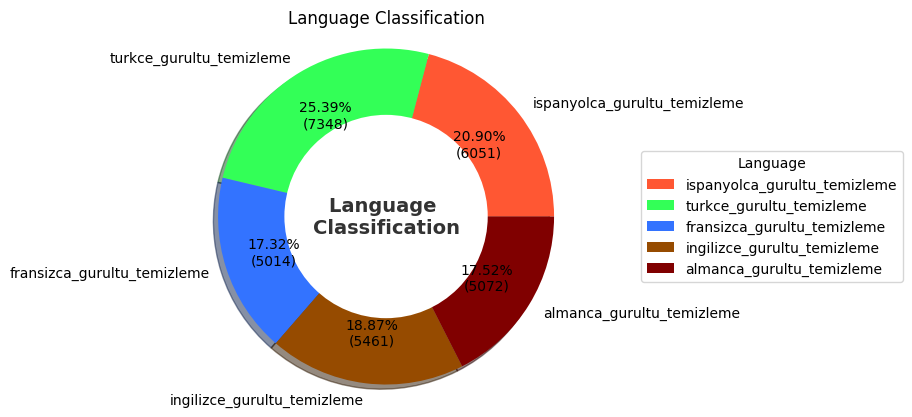

In [ ]:
# INPUT_DIR içindeki tüm alt dizinleri (klasörleri) bul
subdirectories = [subdir for subdir in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, subdir))]

# Her alt dizindeki .wav dosyalarının sayısını saklamak için bir liste
num_wav_files = []
for subdir in subdirectories:
    subdir_path = os.path.join(INPUT_DIR, subdir)  # Alt dizinin tam yolunu al
    wav_files = [file for file in os.listdir(subdir_path) if file.endswith('.wav')]  # .wav dosyalarını filtrele
    num_wav_files.append(len(wav_files))  # Her alt dizindeki .wav dosyalarının sayısını ekle

# Toplam .wav dosyası sayısını hesapla
total_files = sum(num_wav_files)

# Her sınıfın yüzdesini hesapla
percentages = [(num_files / total_files) * 100 for num_files in num_wav_files]

# Alt dizin isimleri ve renk paleti tanımlanıyor
unique_emotion = subdirectories
colors = ['#FF5733', '#33FF57', '#3373FF', '#964B00', '#800000']  # Dil sınıflarını temsil eden renkler

# Dil sınıfları için dilimlerin patlama oranı (explode)
explode = [0] * len(unique_emotion)  # Tüm dilimler sabit kalıyor (patlamıyor)

# Grafik oluşturma
fig, ax = plt.subplots()

# Pasta grafiği oluştur
wedges, texts, autotexts = ax.pie(
    x=num_wav_files,  # Her sınıftaki .wav dosyası sayısı
    labels=unique_emotion,  # Pasta dilimlerine eklenecek etiketler
    autopct=lambda p: f'{p:.2f}%\n({int(p*total_files/100)})',  # Yüzde ve dosya sayısını göster
    wedgeprops=dict(width=0.7),  # Dilimlerin genişliği
    textprops=dict(size=10, color="black"),  # Dilim içi yazı özellikleri
    pctdistance=0.7,  # Yüzde yazılarının merkezden uzaklığı
    colors=colors,  # Dilimler için renkler
    explode=explode,  # Dilimlerin patlama oranı
    shadow=True  # Gölgeli grafik
)

# Pasta grafiğinin merkezine bir beyaz çember ekle
center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

# Merkezde açıklama metni
ax.text(0, 0, 'Language \nClassification', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

# Grafik için açıklama kutusu
ax.legend(unique_emotion, title="Language", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Grafik eksenlerini eşitle ve başlık ekle
ax.axis('equal')
plt.title('Language Classification')

# Grafiği göster
plt.show()

## Bir ana dizindeki alt klasörlerde bulunan en fazla 5 .wav dosyasını okuyarak dalgaboyu ve frekans spektrumu grafikleri oluşturur ve gösterir.

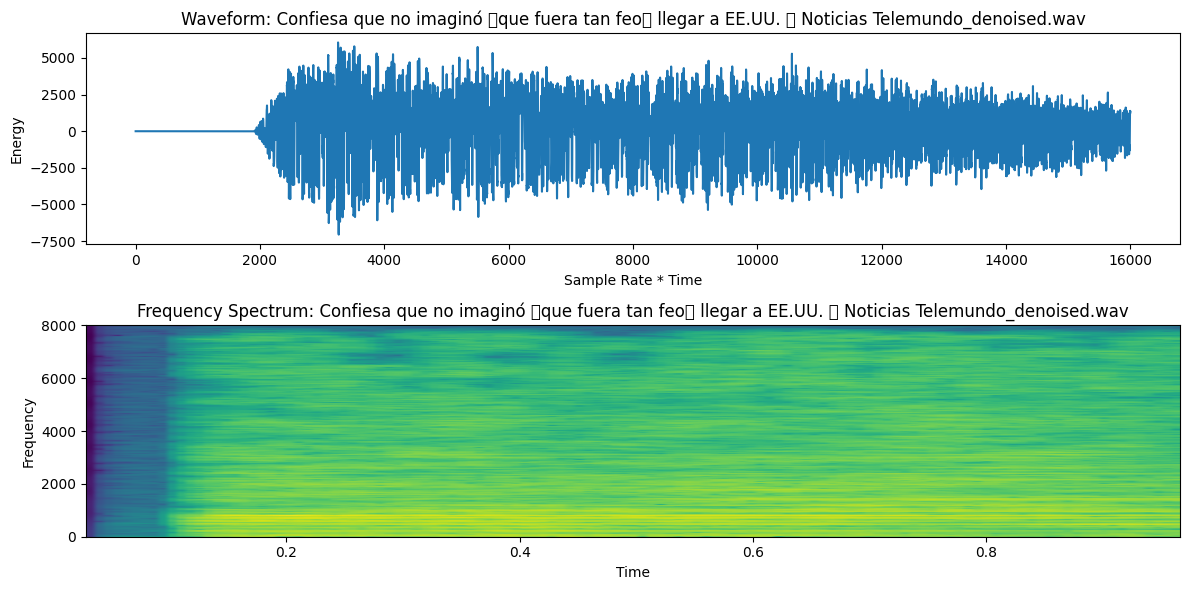

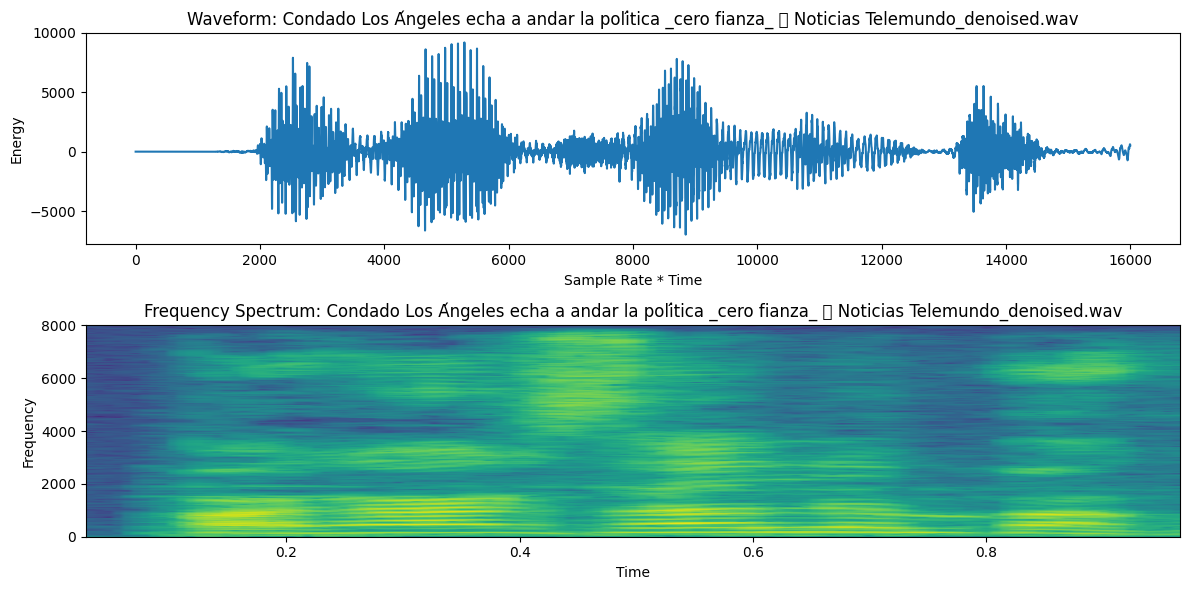

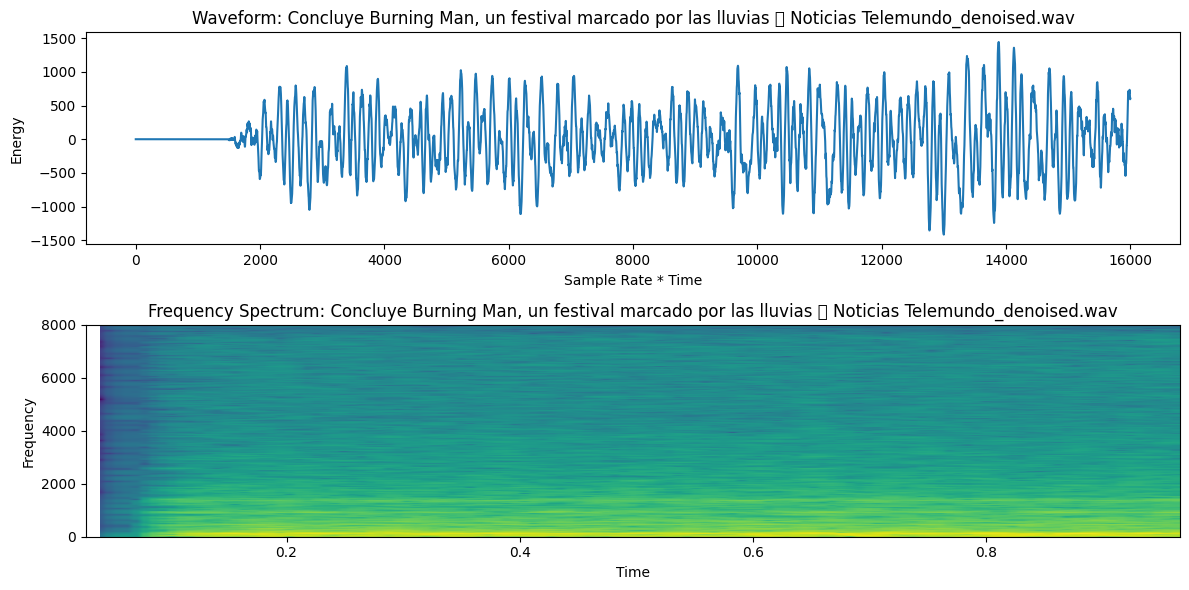

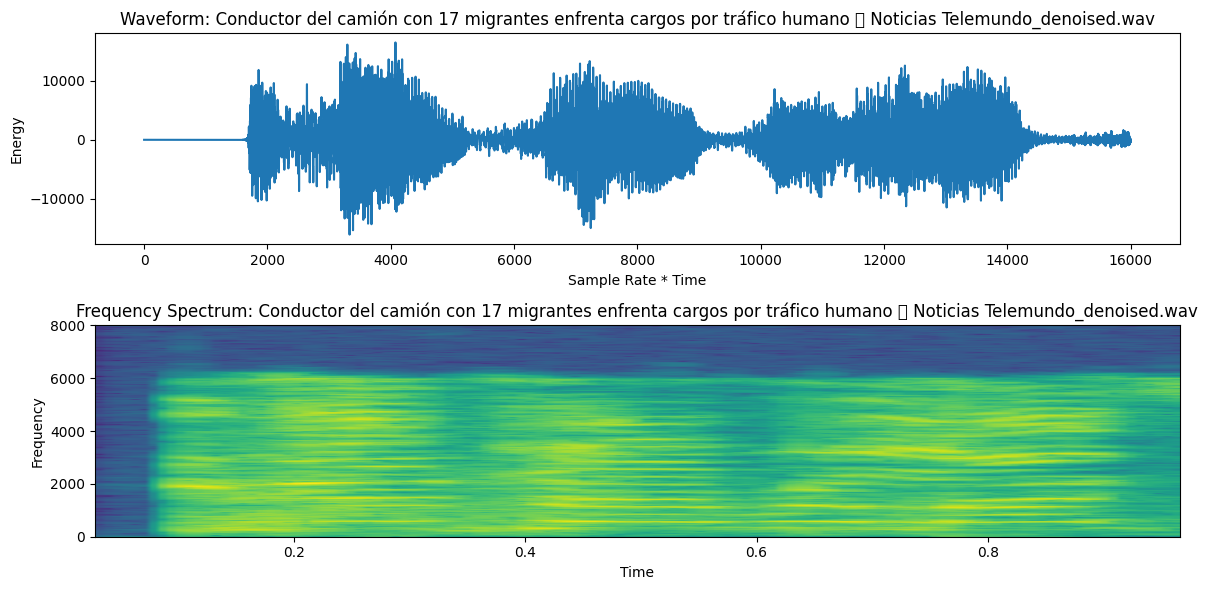

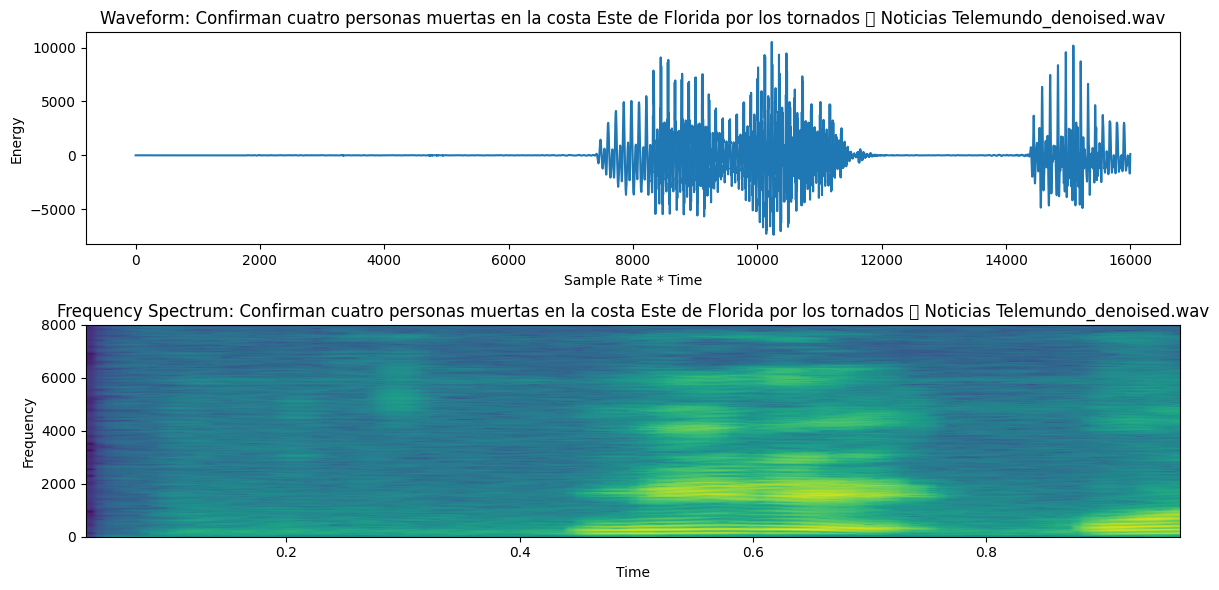

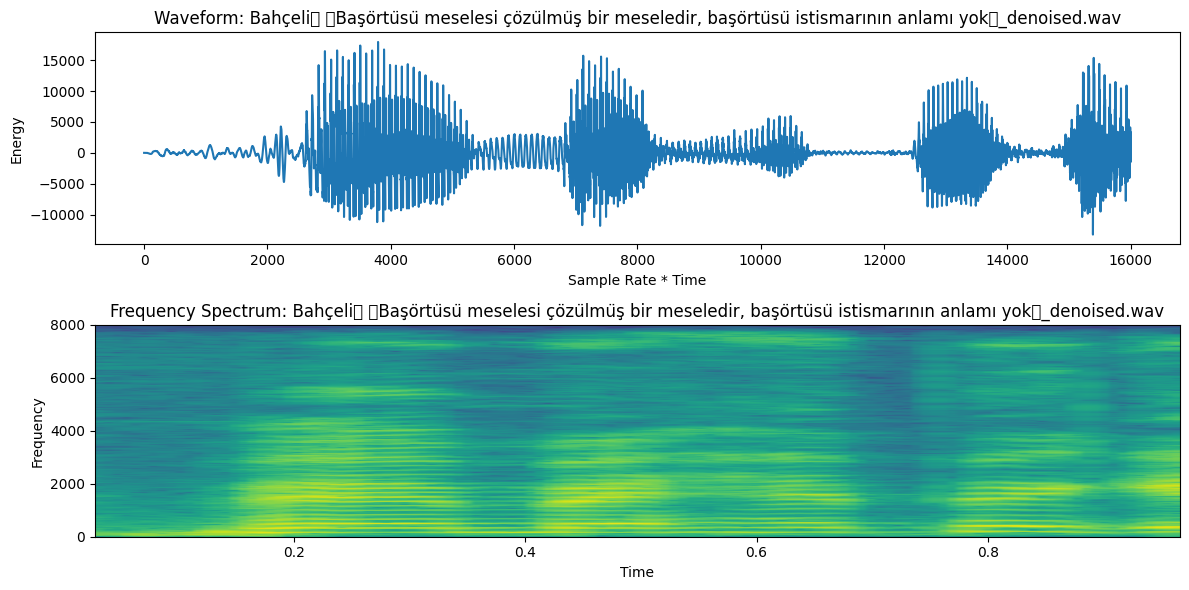

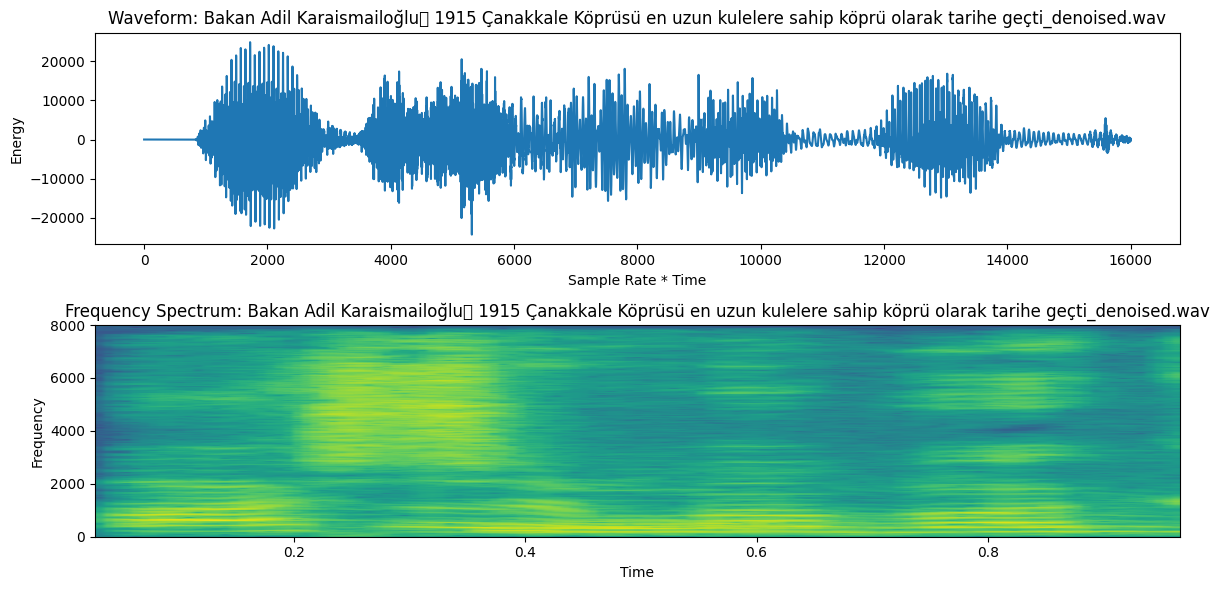

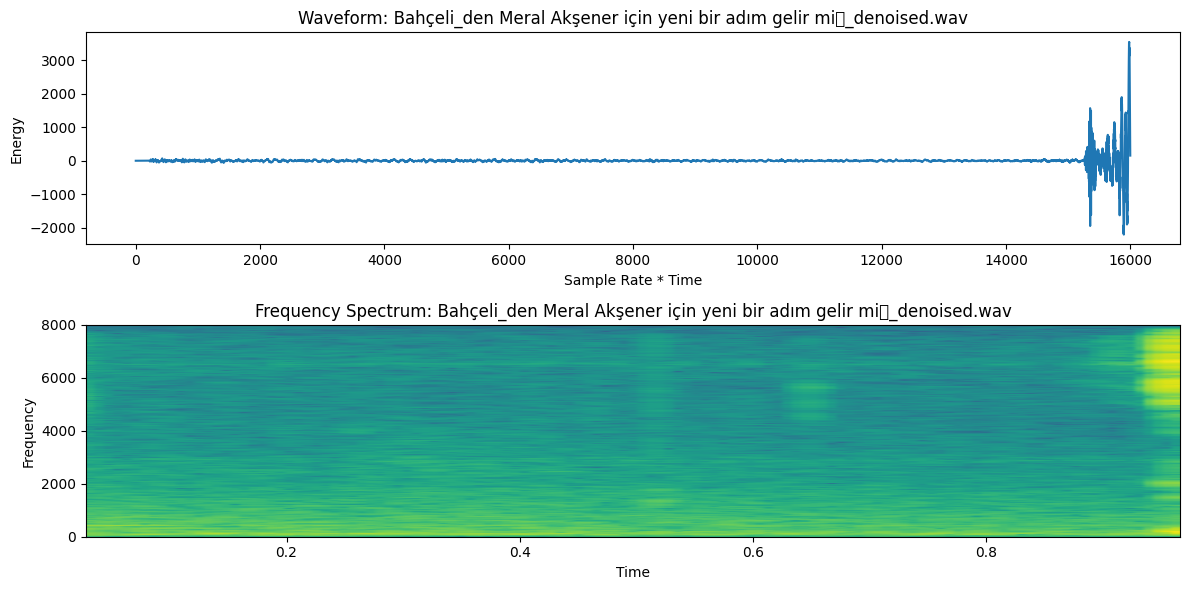

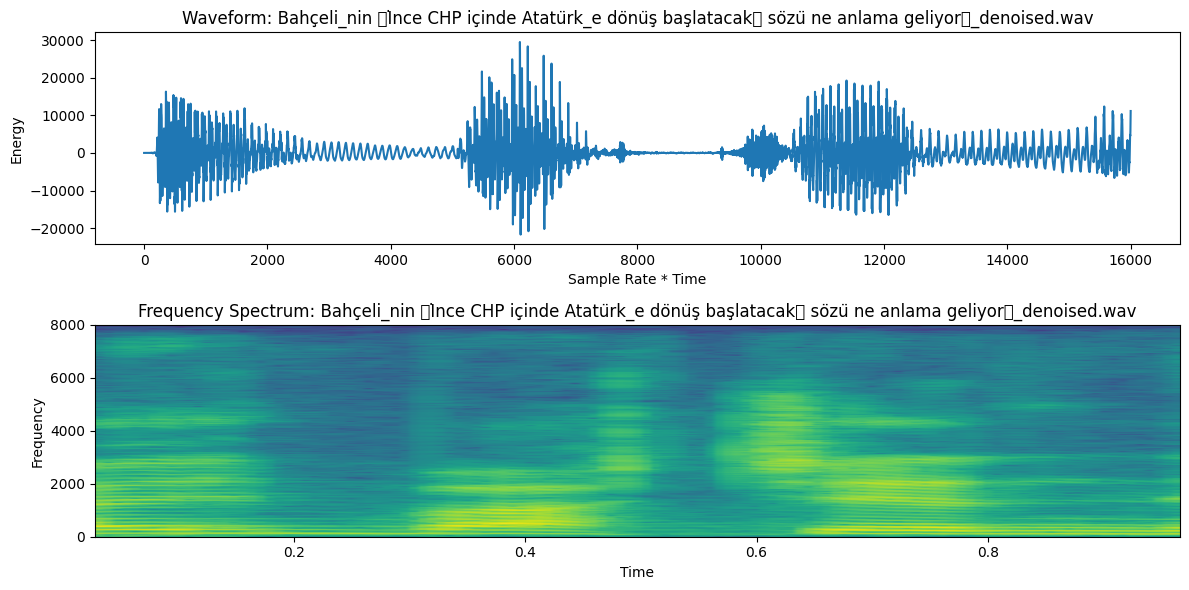

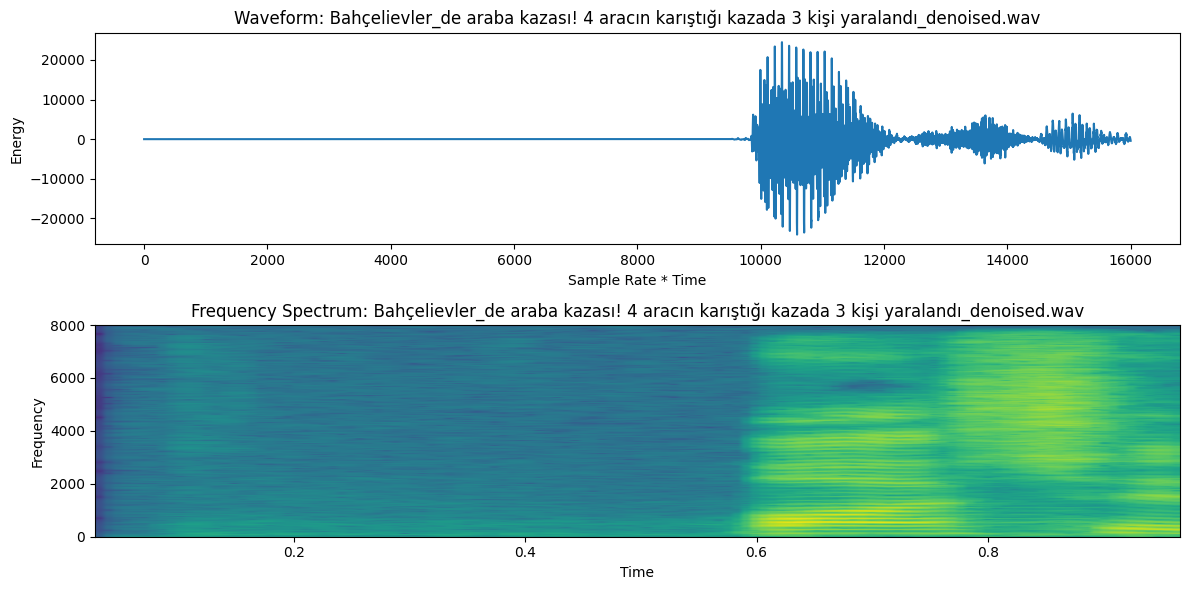

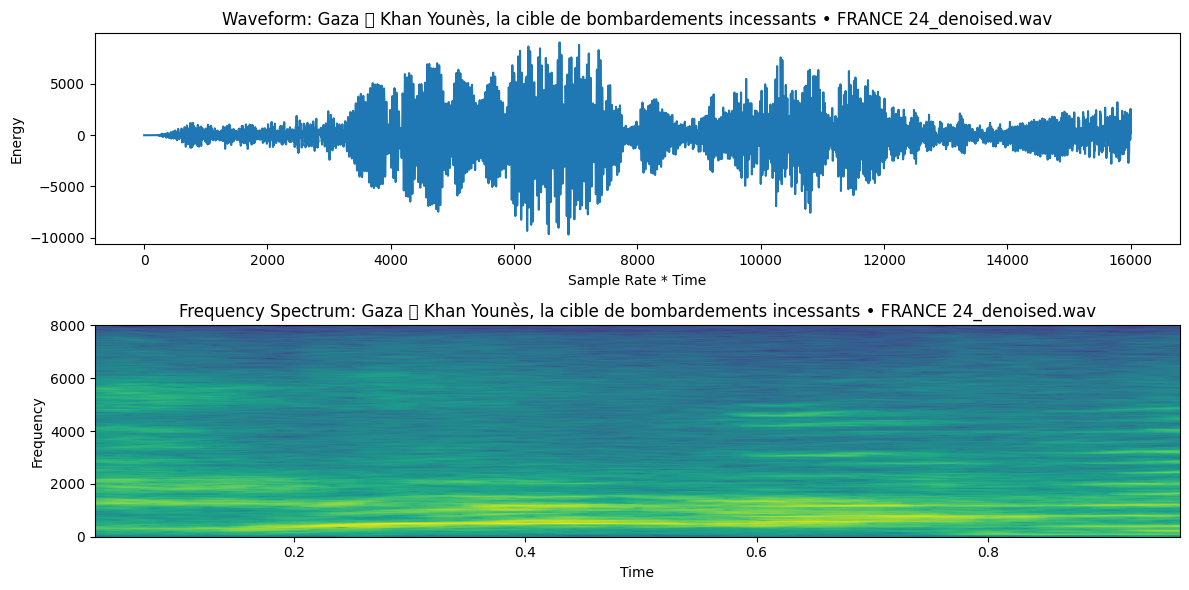

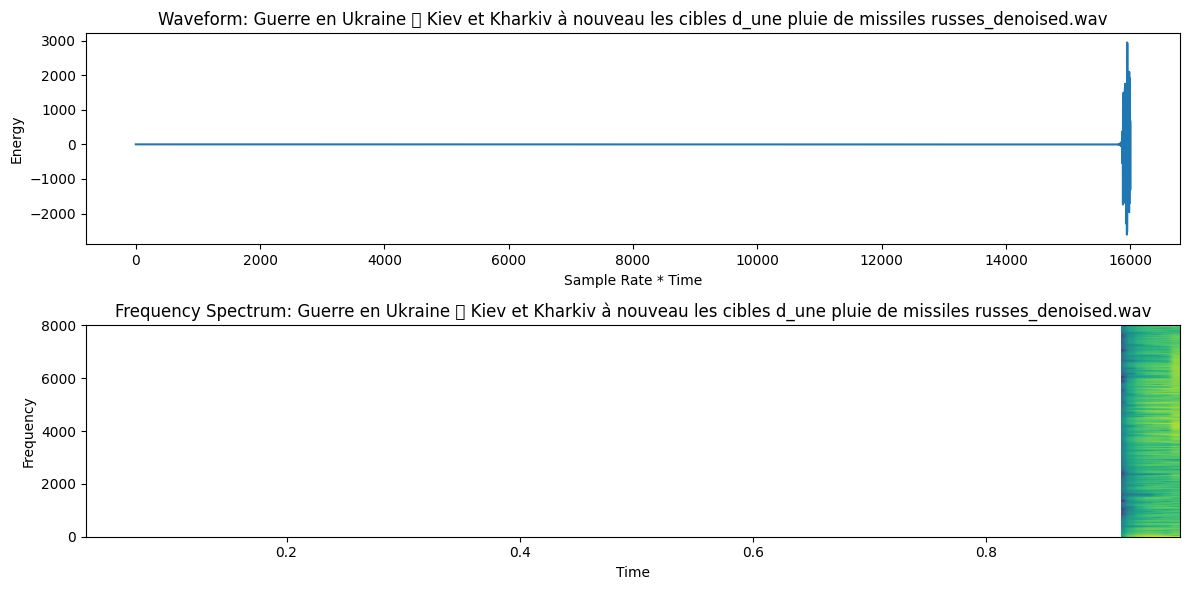

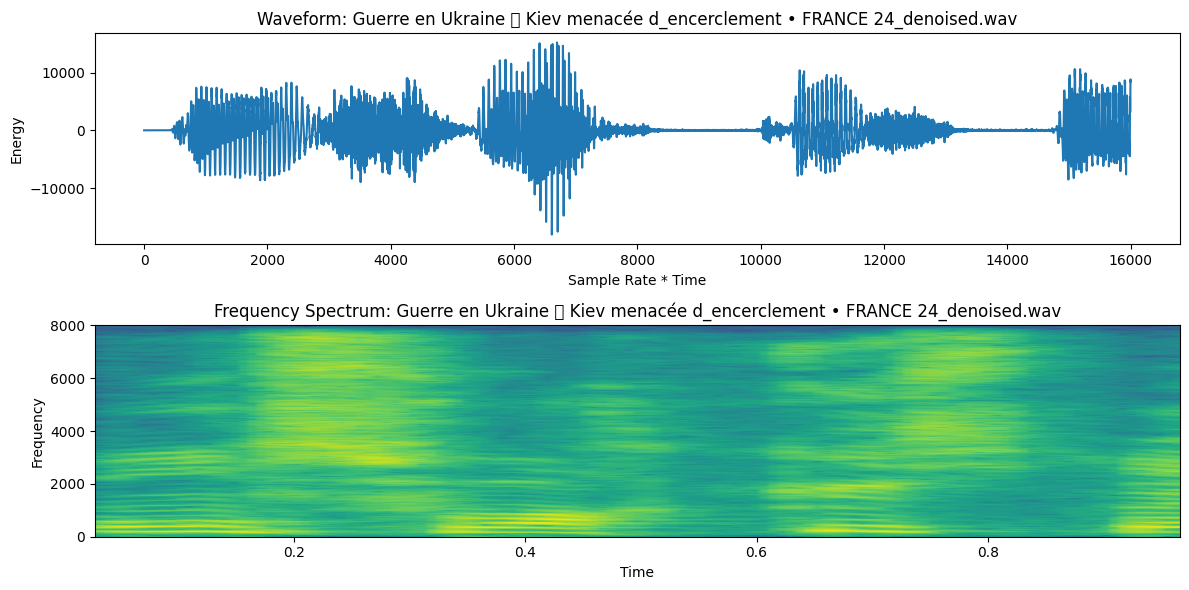

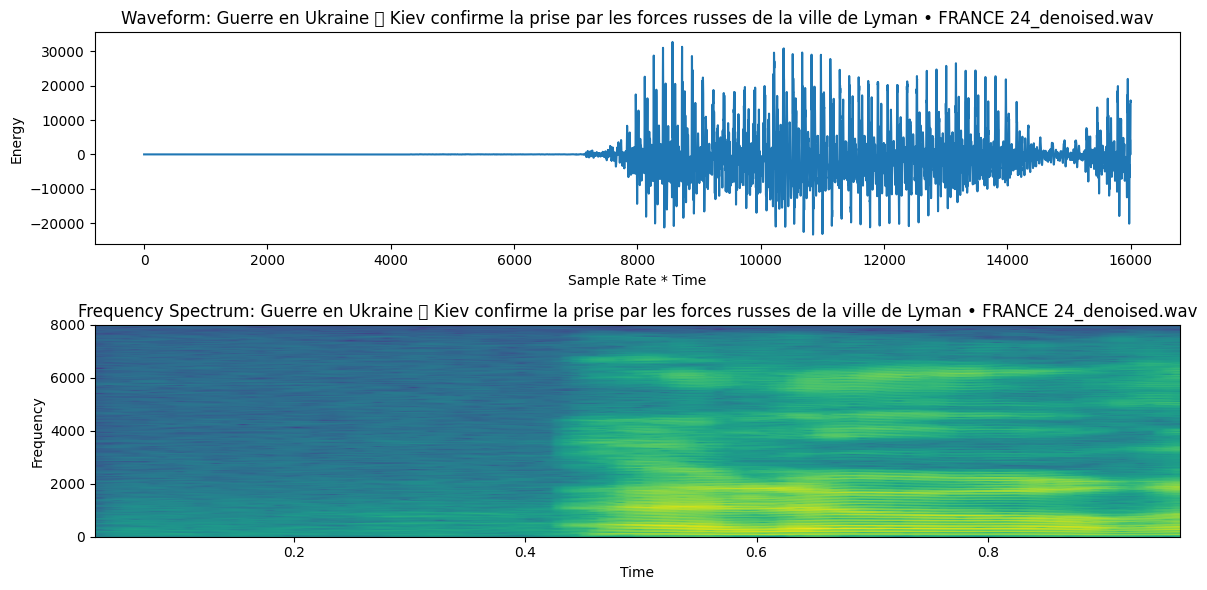

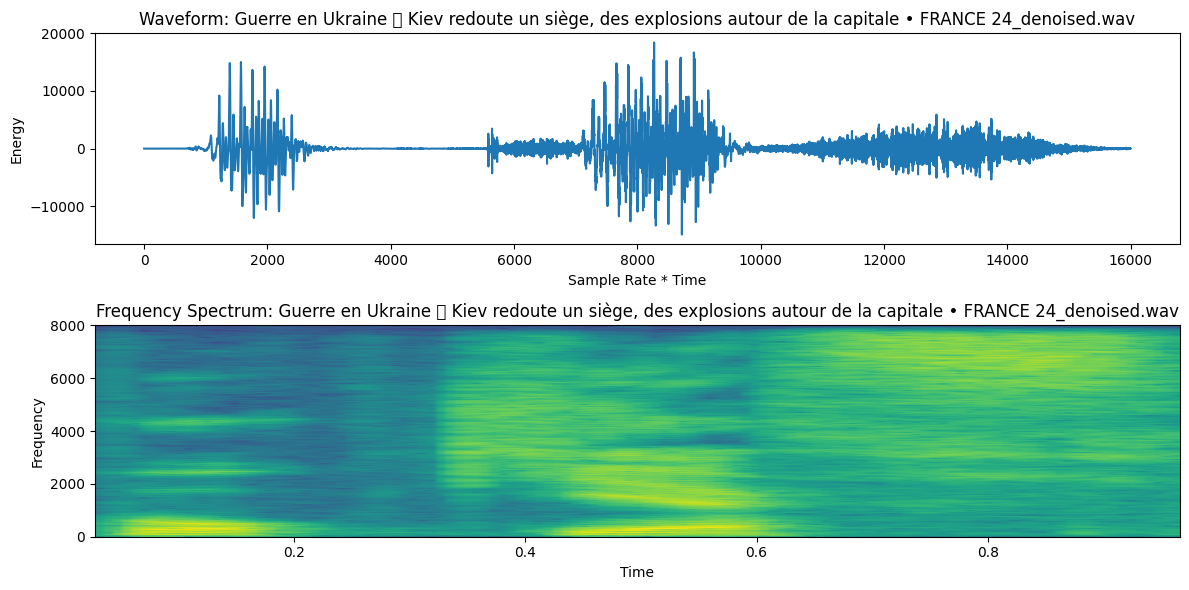

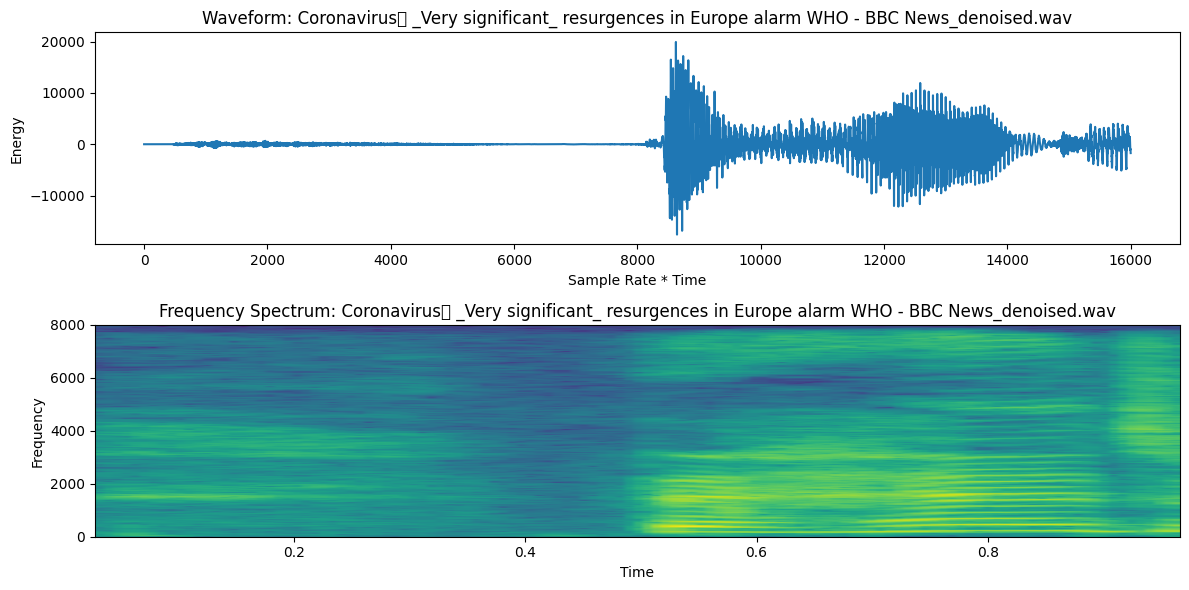

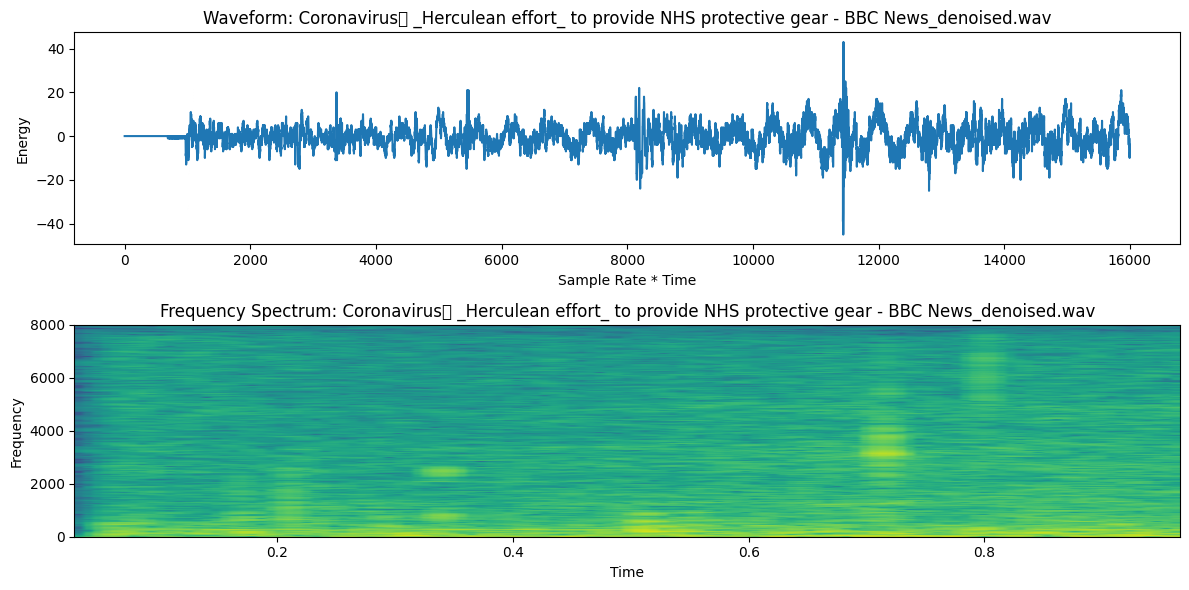

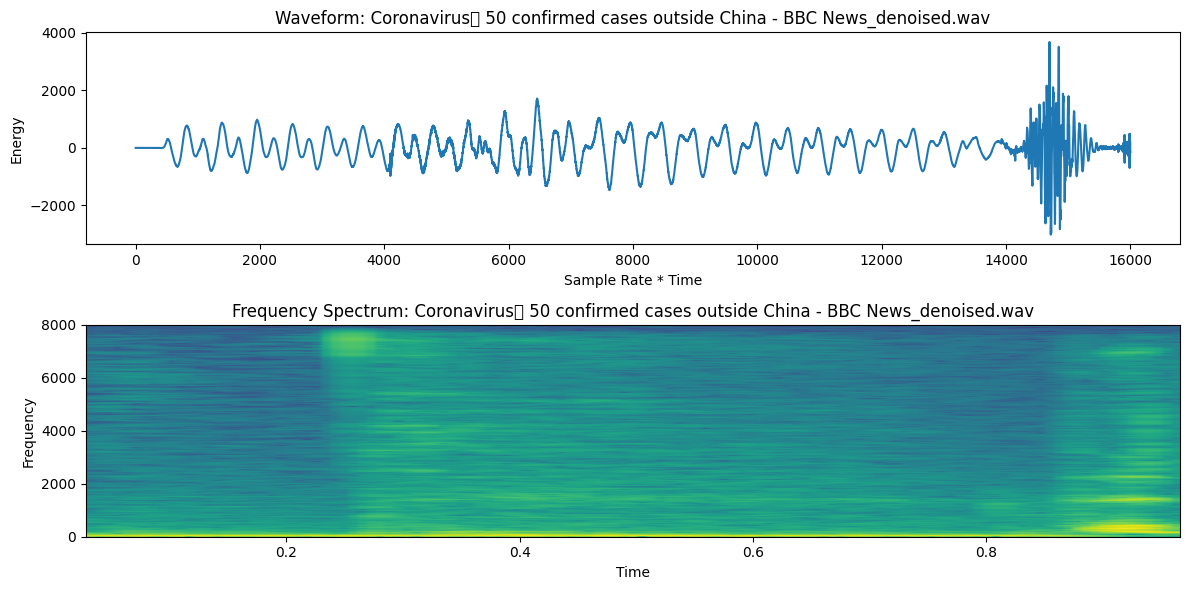

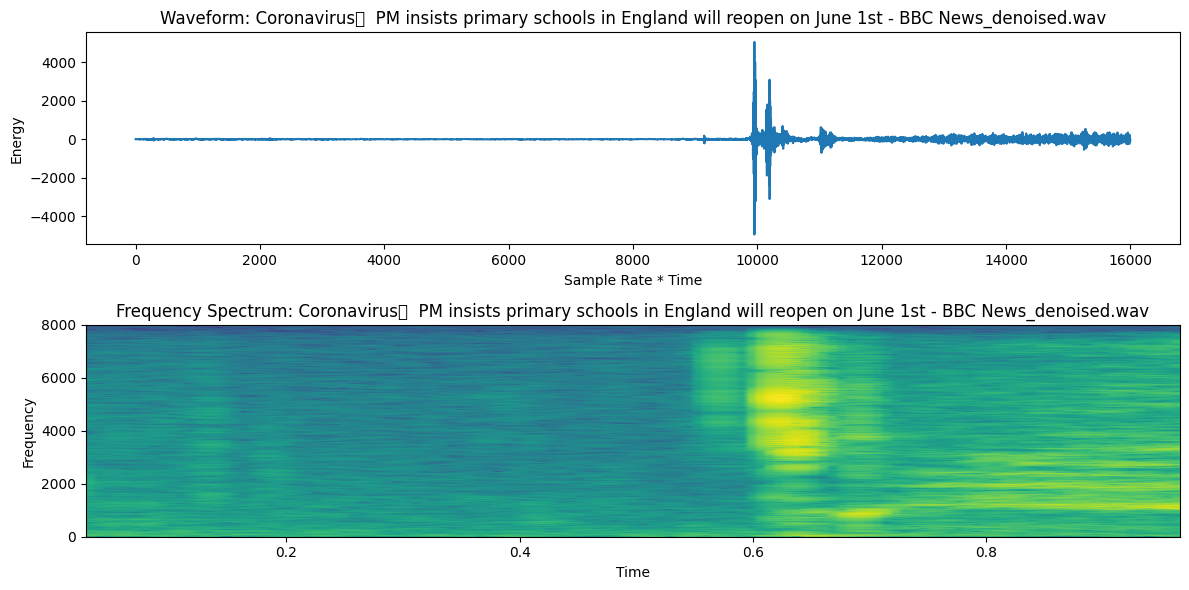

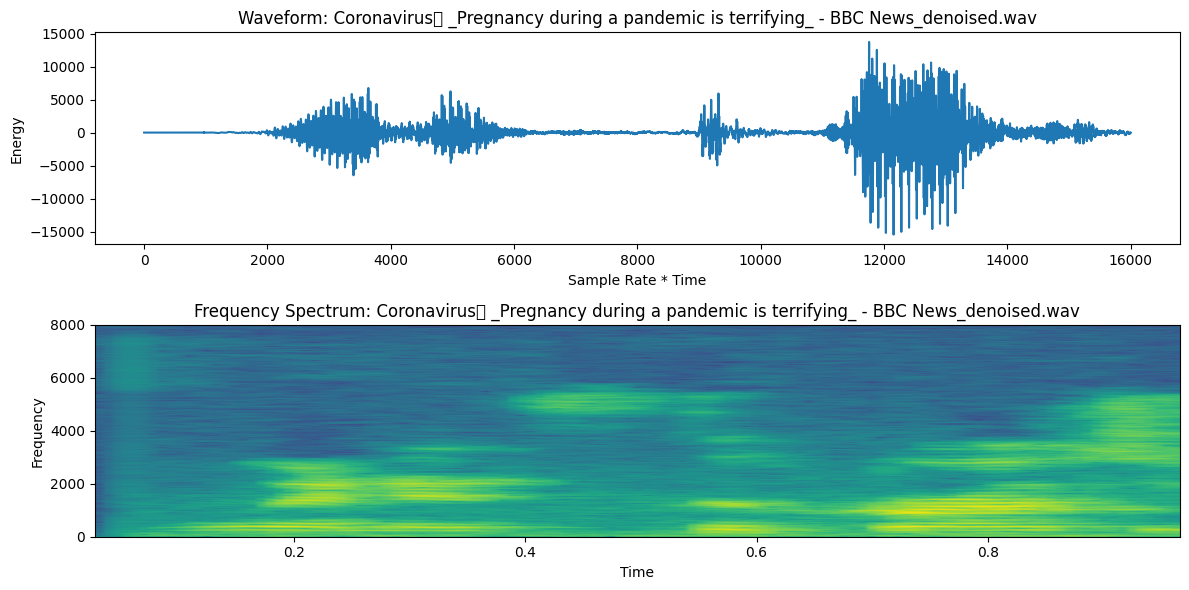

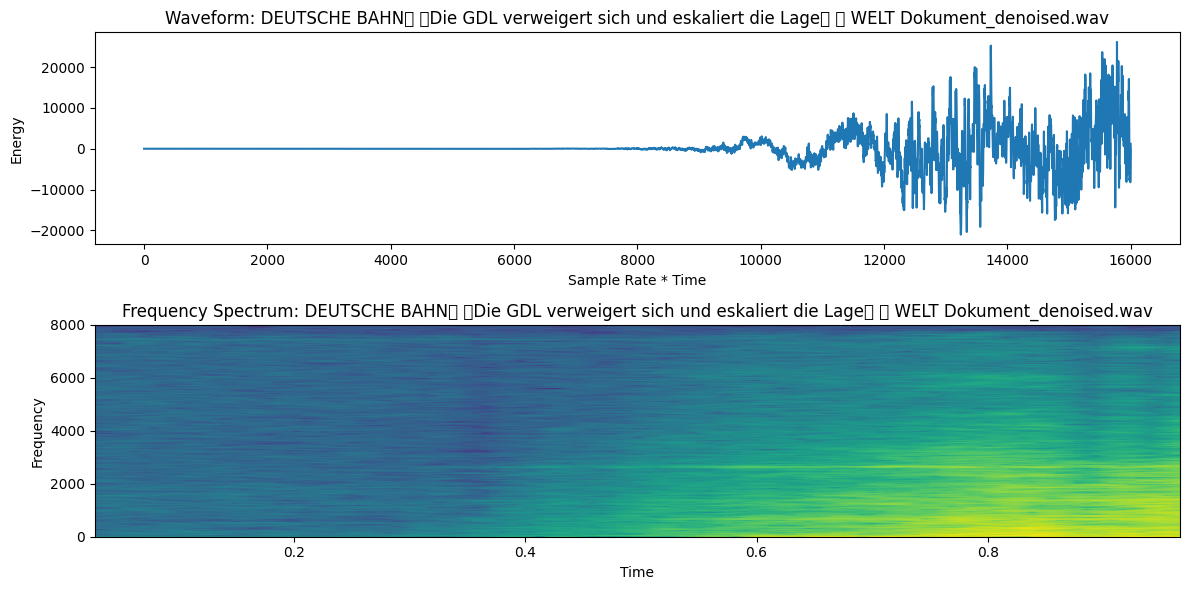

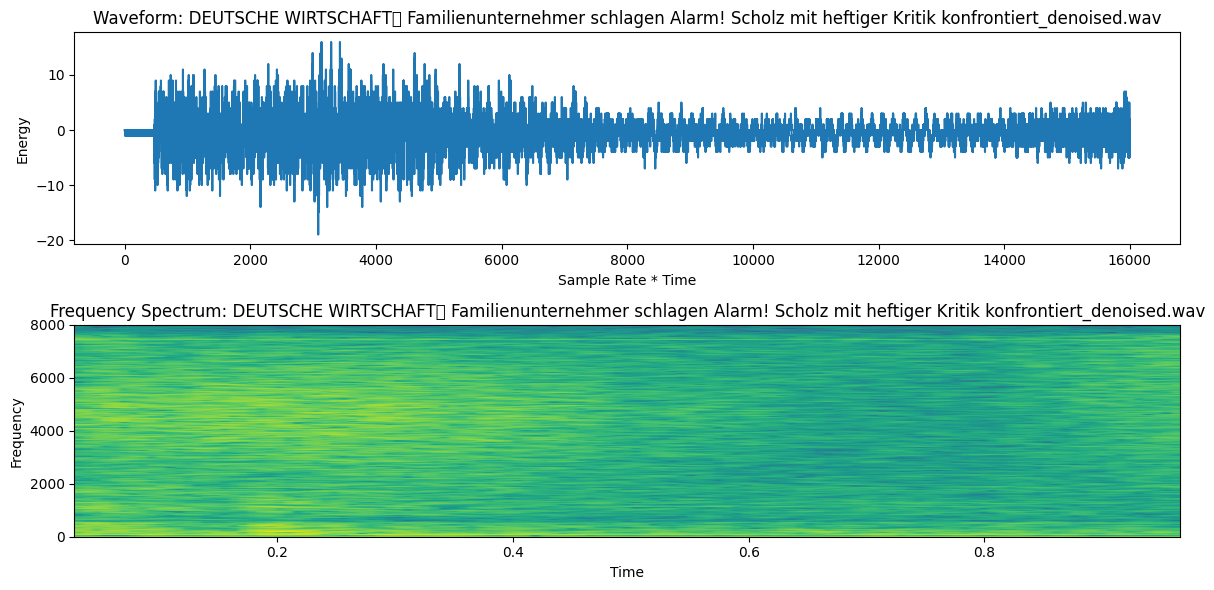

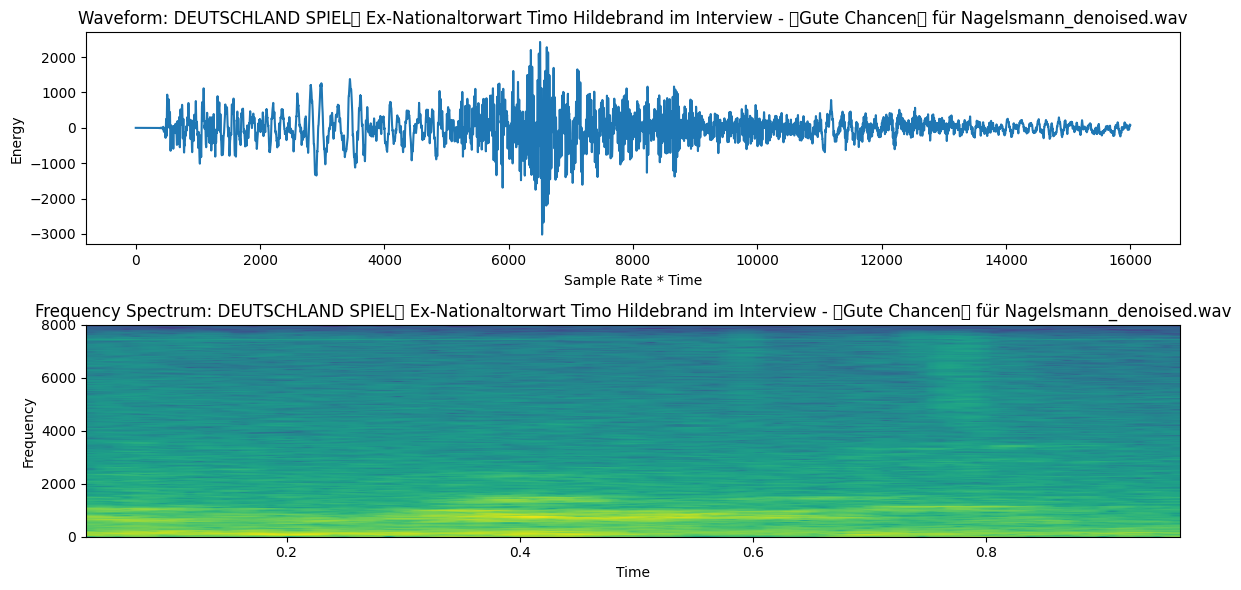

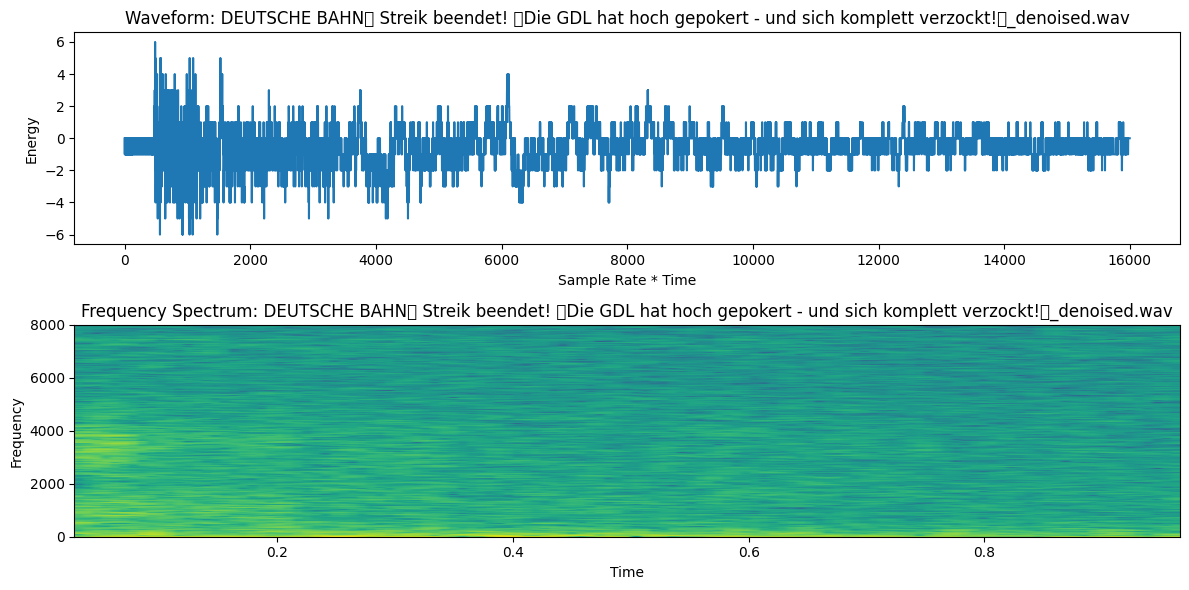

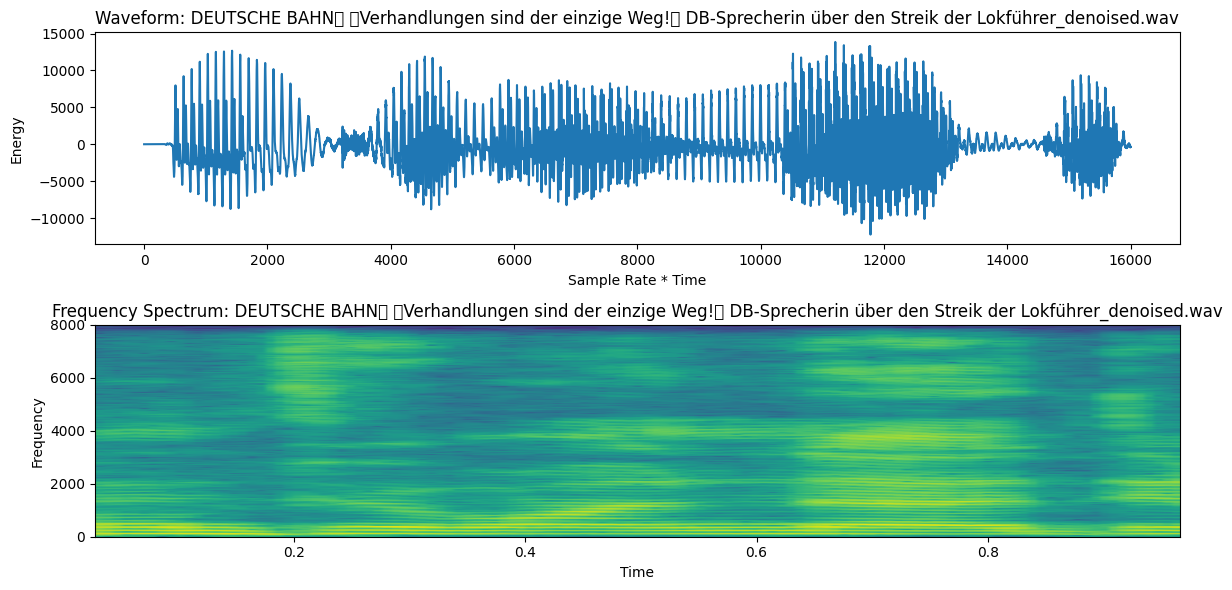

In [ ]:
# INPUT_DIR içindeki tüm alt dizinleri (klasörleri) bul
subdirectories = [subdir for subdir in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, subdir))]

# Her alt dizini işle
for subdir in subdirectories:
    subdir_path = os.path.join(INPUT_DIR, subdir)  # Alt dizinin tam yolunu al
    wav_files = [file for file in os.listdir(subdir_path) if file.endswith('.wav')]  # .wav dosyalarını listele

    # Her alt dizindeki en fazla 5 .wav dosyasını işle
    for i in range(min(5, len(wav_files))):
        file_path = os.path.join(subdir_path, wav_files[i])  # Her bir .wav dosyasının tam yolunu al
        signal_wave = wave.open(file_path, 'r')  # WAV dosyasını aç
        sample_rate = 16000  # Sabit örnekleme hızı
        sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)  # Ses sinyalini al

        # Grafik oluşturma
        plt.figure(figsize=(12, 6))

        # Dalgaboyu grafiği
        plt.subplot(211)  # Üst kısımda dalgaboyu
        plt.title(f'Waveform: {wav_files[i]}')  # Başlık
        plt.plot(sig)  # Sinyali çiz
        plt.xlabel('Sample Rate * Time')  # X ekseni etiketi
        plt.ylabel('Energy')  # Y ekseni etiketi

        # Frekans spektrumu grafiği
        plt.subplot(212)  # Alt kısımda spektrum
        plt.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)  # Spektrum grafiği oluştur
        plt.title(f'Frequency Spectrum: {wav_files[i]}')  # Başlık
        plt.xlabel('Time')  # X ekseni etiketi
        plt.ylabel('Frequency')  # Y ekseni etiketi

        # Grafik düzenlemeleri ve gösterim
        plt.tight_layout()  # Grafik elemanlarını sıkıştırarak daha düzenli hale getir
        plt.show()  # Grafiği göster

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at facebook/hubert-large-ls960-ft and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-2-4d6ae1c9530c>:349: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Model: facebook/hubert-large-ls960-ft | Epoch 1/10:   0%|          | 0/900 [00:00<?, ?it/s]<ipython-input-2-4d6ae1c9530c>:376: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
<ipython-input-2-4d6ae1c9530c>:451: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible t

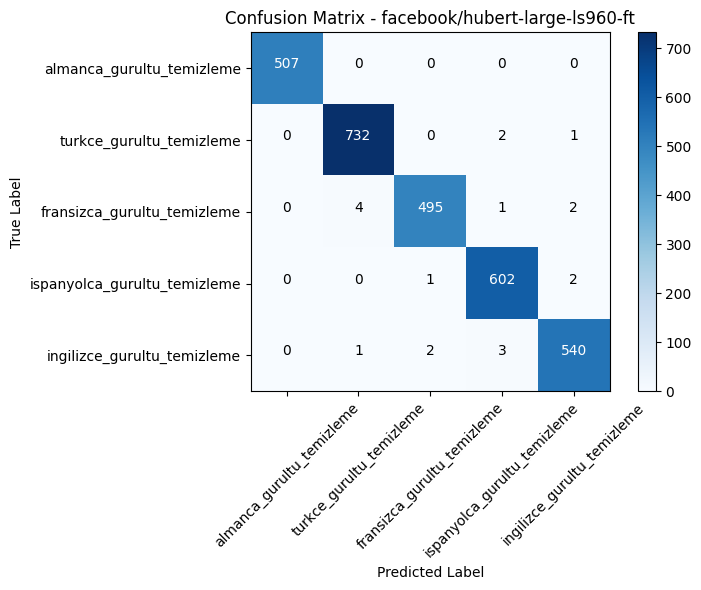

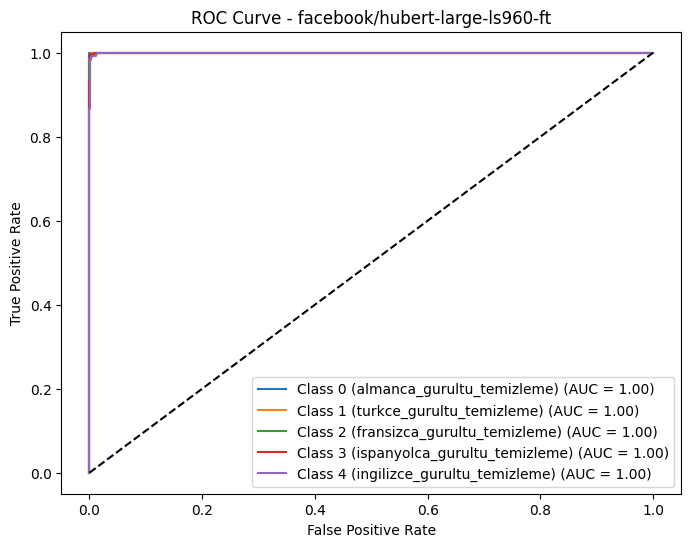

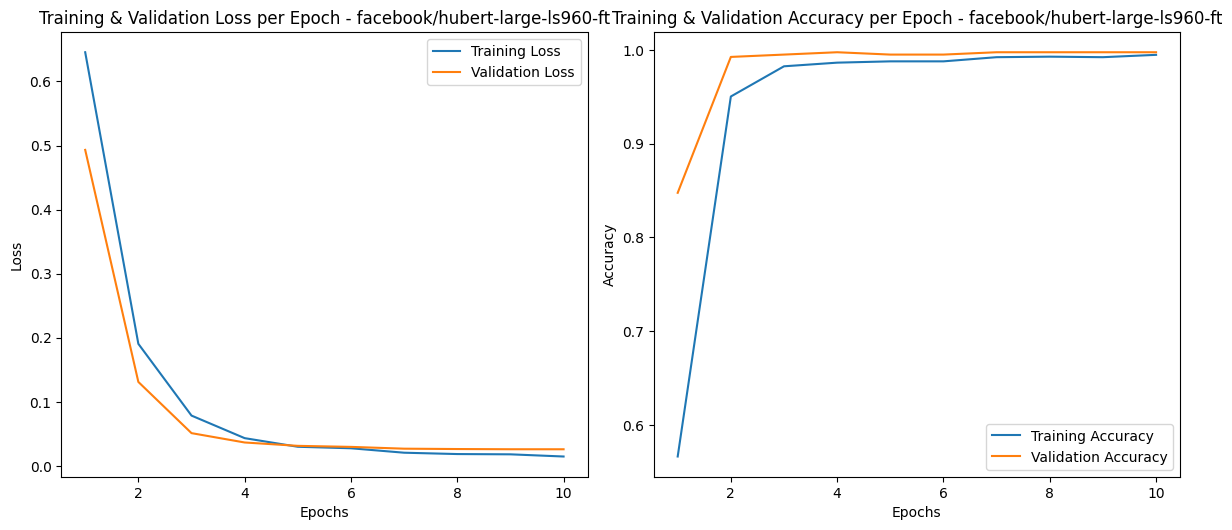

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at facebook/hubert-base-ls960 and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-2-4d6ae1c9530c>:349: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Model: facebook/hubert-base-ls960 | Epoch 1/10:   0%|          | 0/900 [00:00<?, ?it/s]<ipython-input-2-4d6ae1c9530c>:376: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
<ipython-input-2-4d6ae1c9530c>:451: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to constr

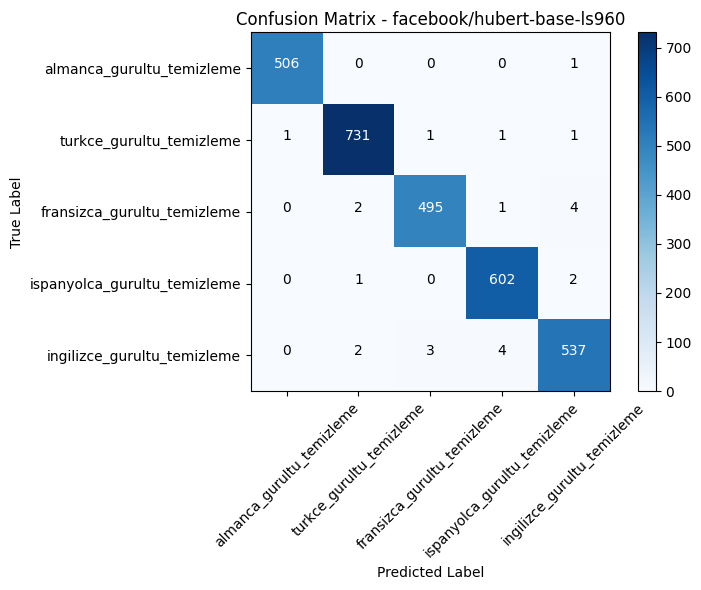

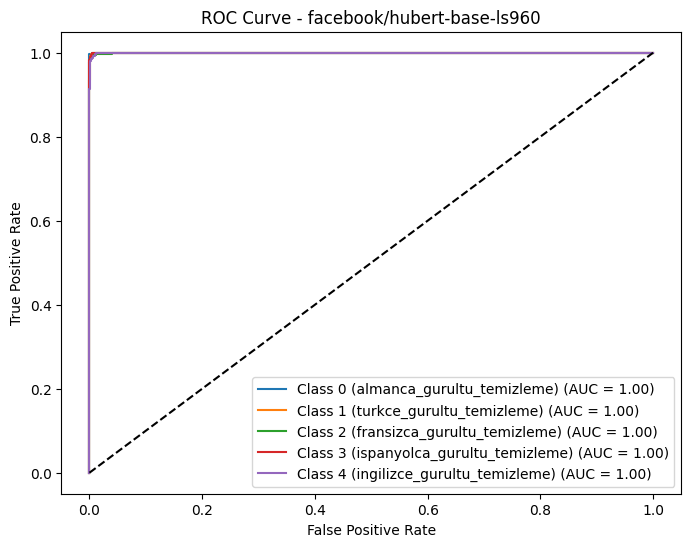

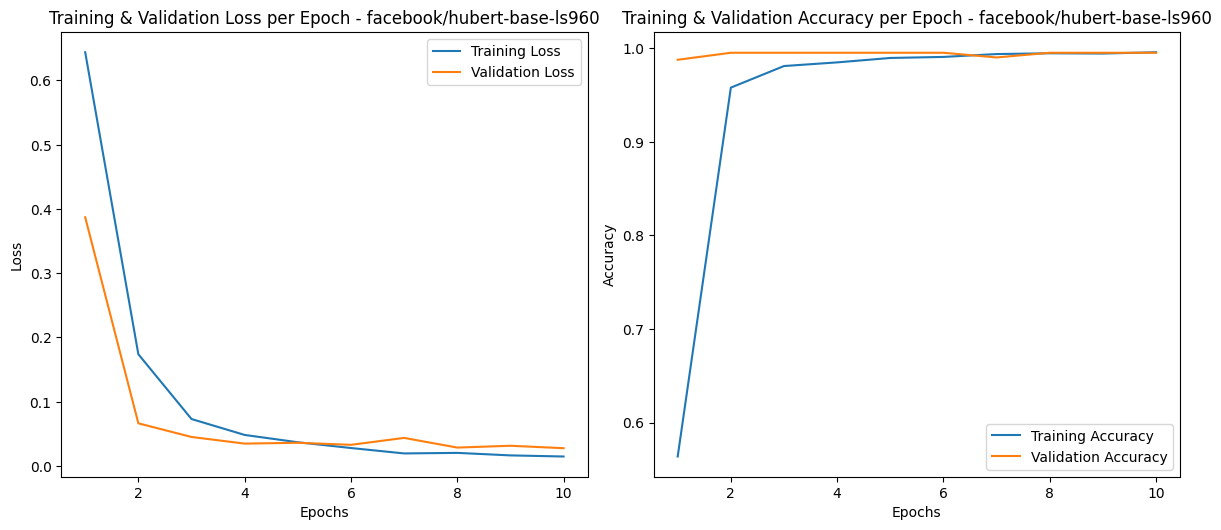

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-2-4d6ae1c9530c>:349: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Model: facebook/wav2vec2-base-960h | Epoch 1/10:   0%|          | 0/900 [00:00<?, ?it/s]<ipython-input-2-4d6ae1c9530c>:376: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
<ipython-input-2-4d6ae1c9530c>:451: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module im

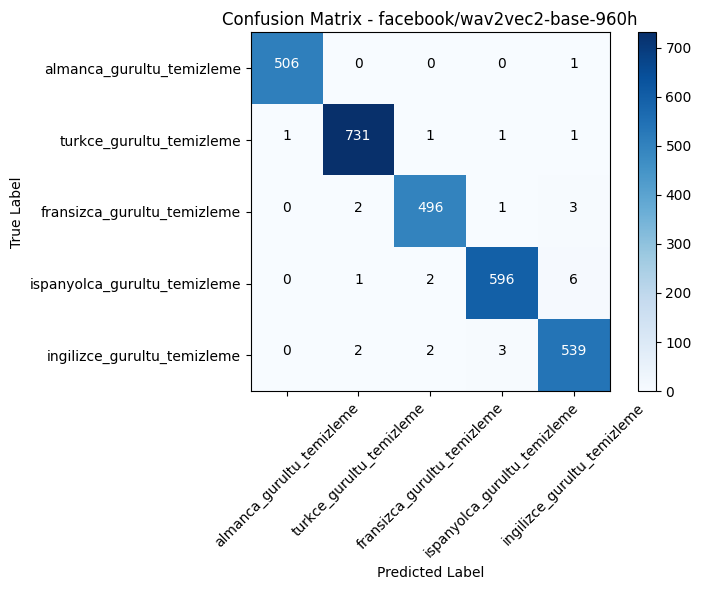

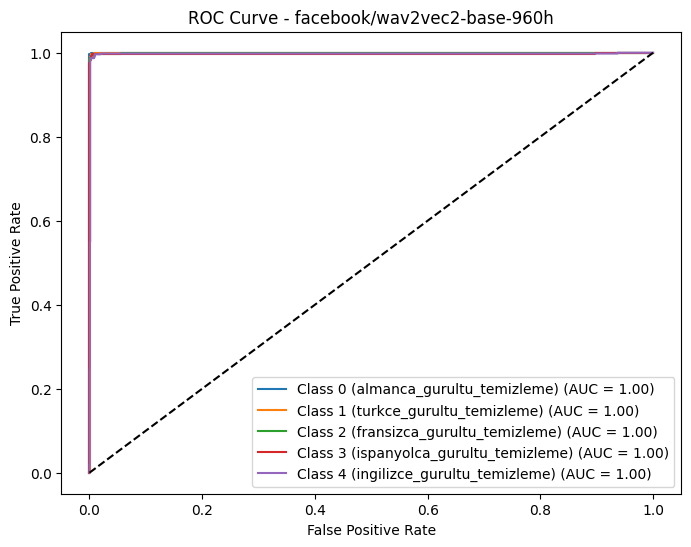

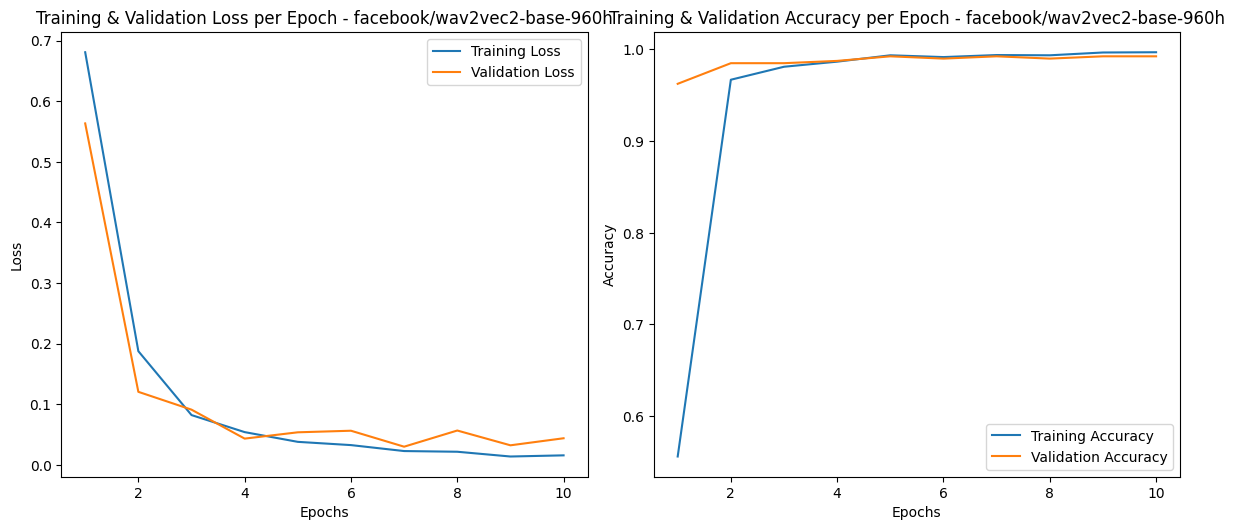

config.json:   0%|          | 0.00/2.24k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of WavLMForSequenceClassification were not initialized from the model checkpoint at microsoft/wavlm-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-2-4d6ae1c9530c>:349: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Model: microsoft/wavlm-base | Epoch 1/10:   0%|          | 0/900 [00:00<?, ?it/s]<ipython-input-2-4d6ae1c9530c>:376: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
<ipython-input-2-4d6ae1c9530c>:451: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious

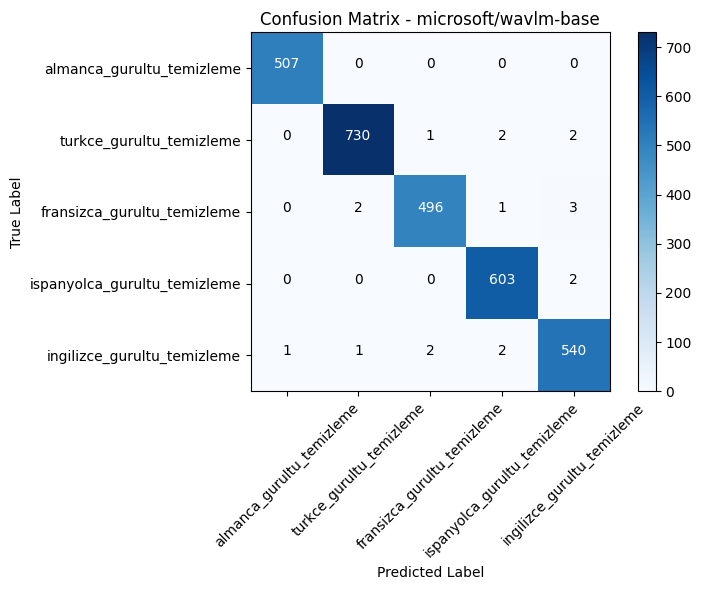

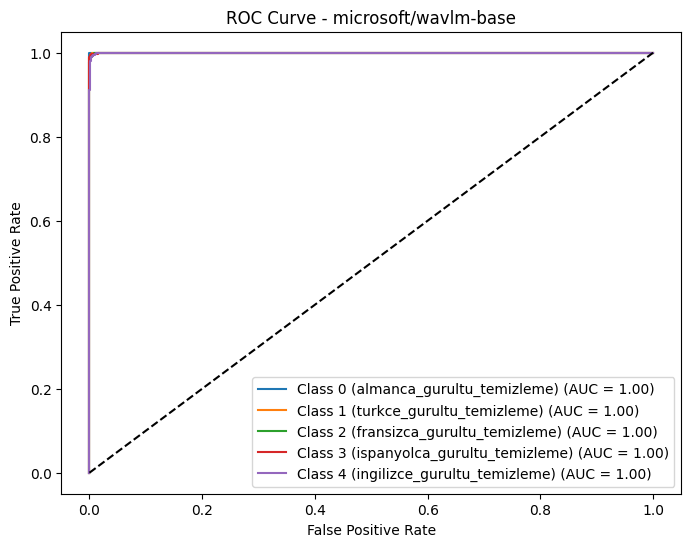

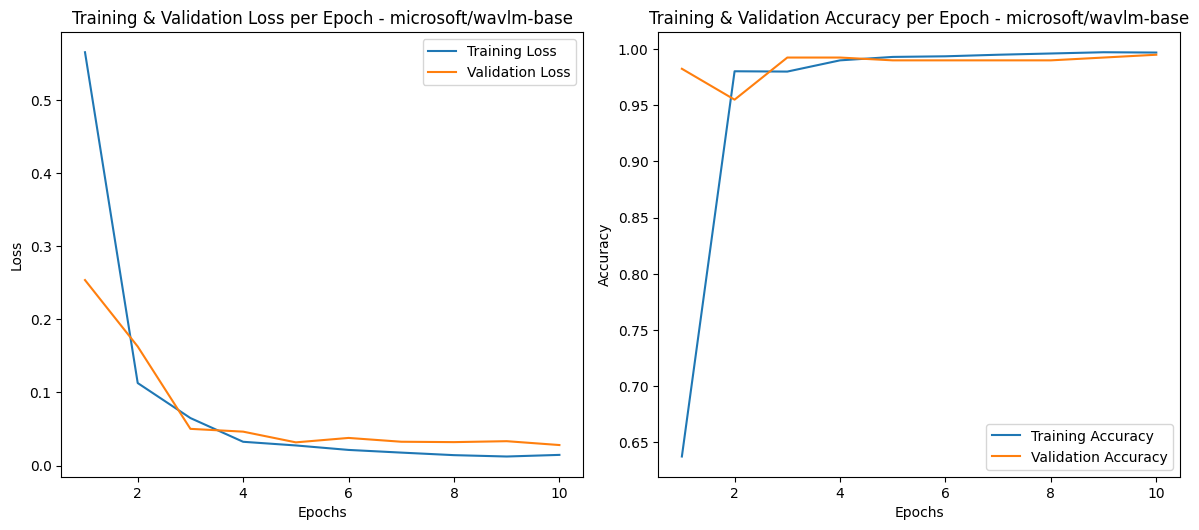

config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:311: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-2-4d6ae1c9530c>:349: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Model: facebook/wav2vec2-base | Epoch 1/10:   0%|          | 0/900 [00:00<?, ?it/s]<ipython-input-2-4d6ae1c9530c>:376: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
<ipython-input-2-4d6ae1c9530c>:451: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct ma

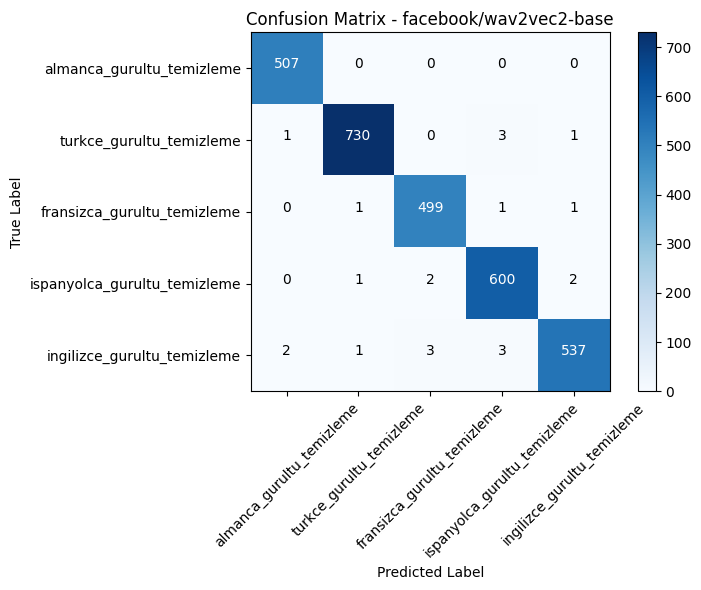

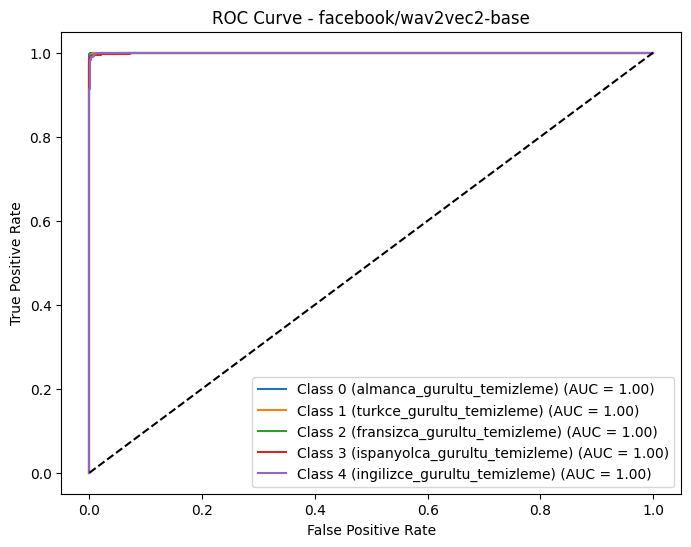

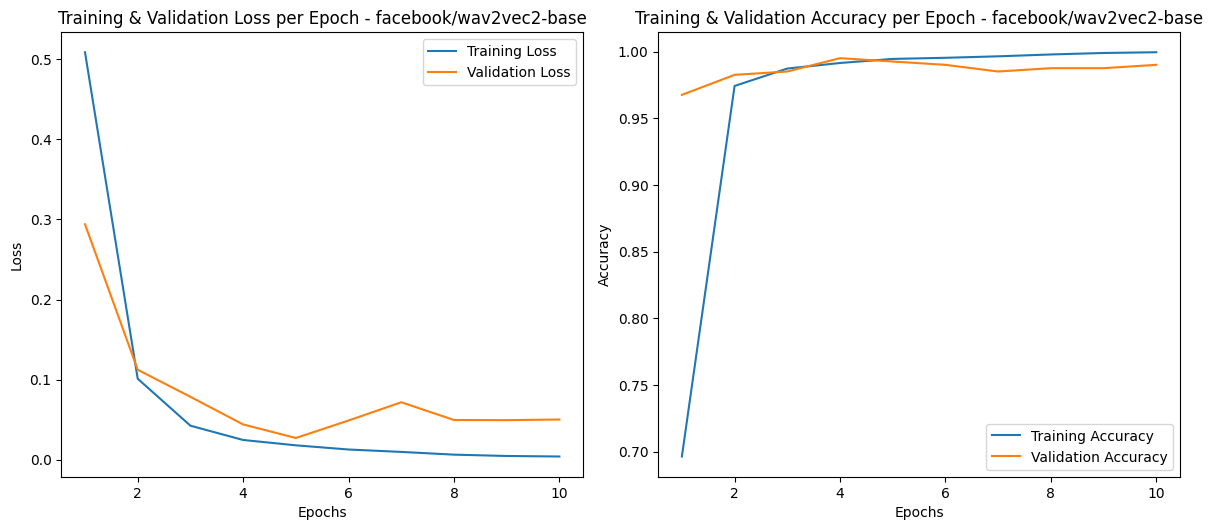


=== Performans Metrikleri: facebook/hubert-large-ls960-ft ===
Accuracy: 0.9934
Precision: 0.9934
Recall (Sensitivity): 0.9934
Specificity: 0.9936
F1-Score: 0.9934
ROC AUC: 0.9998
Inference Time: 644.73 seconds

=== Performans Metrikleri: facebook/hubert-base-ls960 ===
Accuracy: 0.9917
Precision: 0.9917
Recall (Sensitivity): 0.9917
Specificity: 0.9917
F1-Score: 0.9917
ROC AUC: 0.9997
Inference Time: 163.25 seconds

=== Performans Metrikleri: facebook/wav2vec2-base-960h ===
Accuracy: 0.9907
Precision: 0.9907
Recall (Sensitivity): 0.9907
Specificity: 0.9906
F1-Score: 0.9907
ROC AUC: 0.9987
Inference Time: 163.30 seconds

=== Performans Metrikleri: microsoft/wavlm-base ===
Accuracy: 0.9934
Precision: 0.9934
Recall (Sensitivity): 0.9934
Specificity: 0.9934
F1-Score: 0.9934
ROC AUC: 0.9997
Inference Time: 383.01 seconds

=== Performans Metrikleri: facebook/wav2vec2-base ===
Accuracy: 0.9924
Precision: 0.9924
Recall (Sensitivity): 0.9924
Specificity: 0.9922
F1-Score: 0.9924
ROC AUC: 0.9998
I

In [ ]:
import os # Dosya ve dizin işlemleri için gerekli kütüphane
import librosa # Ses dosyalarını işlemek için kullanılan kütüphane
import numpy as np # Sayısal işlemler için kullanılan kütüphane
import torch # Derin öğrenme için PyTorch kütüphanesi sinir ağları oluşturma, eğitim ve değerlendirme gibi görevlerde kullanılır.
from torch.utils.data import DataLoader, Dataset, random_split # PyTorch veri yükleyicisi ve veri kümesi sınıfı
from transformers import (
    HubertForSequenceClassification, # HuBERT modelinin sınıflandırma için kullanımı
    Wav2Vec2ForSequenceClassification, # Wav2Vec2 modelinin sınıflandırma için kullanımı
    WavLMForSequenceClassification,  # WavLM modelinin sınıflandırma için kullanımı
    Wav2Vec2Processor, # Wav2Vec2 modelini kullanarak ses verilerini işlemek için işlemci
    get_linear_schedule_with_warmup # Eğitim için doğrulama hızını ayarlayan yardımcı fonksiyon
)
from sklearn.model_selection import train_test_split # Veriyi eğitim ve test kümelerine ayırma
from sklearn.metrics import (  # Modelin performansını değerlendiren metrikler
    confusion_matrix, roc_curve, auc,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.preprocessing import label_binarize # Etiketleri ikili formatta dönüştürme
import matplotlib.pyplot as plt # Grafik çizmek için kullanılan kütüphane
import time # Zaman ölçümleri için
from tqdm import tqdm  # Eğitim sırasında ilerleme çubuğu göstermek için
import logging  # Hata ve bilgi mesajlarını kaydetmek için
from torch.utils.tensorboard import SummaryWriter # TensorBoard ile eğitim sürecini izlemek için
from torch.cuda.amp import GradScaler, autocast # Otomatik hassasiyet ile eğitim (karışık hassasiyet)
from collections import defaultdict # Varsayılan sözlükler için

# ------------------------------ #
#       Gerekli Ayarlamalar      #
# ------------------------------ #

# Logging yapılandırması
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')  # bilgi seviyesinde mesajları gösterir

# TensorBoard yazarı
writer = SummaryWriter('runs/hubert_experiment') # deneylerin kaydedileceği dizin

# Cihaz ayarı (GPU varsa GPU'yu kullanır, yoksa CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
logging.info(f"Cihaz: {device}") # Cihazın türünü loglamak (GPU ya da CPU)

# ------------------------------ #
#         Veri Hazırlığı         #
# ------------------------------ #

# HuBERT işlemcisi (Wav2Vec2 ve Hubert için aynı işlemci kullanılabilir)
processor = Wav2Vec2Processor.from_pretrained("facebook/hubert-large-ls960-ft")  # HuBERT için önceden eğitilmiş işlemciyi yükle

def preprocess_audio_hubert(file_path, sampling_rate=16000):
    """
    WAV dosyasını yükler ve HuBERT için uygun giriş formatına dönüştürür.
    """
    audio, _ = librosa.load(file_path, sr=sampling_rate)  # Librosa ile ses dosyasını yükler

    # NaN kontrolü
    if np.isnan(audio).any(): # Ses verisinde NaN (geçersiz) değer olup olmadığını kontrol eder
        logging.warning(f"NaN değerler bulundu: {file_path}") # Uyarı mesajı loglanır
        # NaN değerleri temizleyebilirsiniz
        audio = np.nan_to_num(audio) # NaN değerlerini sıfırla değiştirir

    inputs = processor(audio, sampling_rate=sampling_rate, return_tensors="pt", padding=True).input_values # HuBERT işlemcisi ile ses verisini işler
    return inputs.squeeze(0)  # Sıkıştırılmış tekil örneği döndürür

class HubertDataset(Dataset): # PyTorch'un Dataset sınıfını miras alarak özel bir dataset sınıfı tanımlar
    def __init__(self, file_paths, labels):
        self.file_paths = file_paths # Ses dosyalarının yolları
        self.labels = labels # Ses dosyalarına ait etiketler

    def __len__(self): # Dataset'in uzunluğunu döndürür
        return len(self.file_paths)

    def __getitem__(self, idx): # Verilen index'e göre örnek alır
        file_path = self.file_paths[idx] # Dosya yolunu al
        label = self.labels[idx] # İlgili etiketi al
        inputs = preprocess_audio_hubert(file_path) # Ses dosyasını işle
        return inputs, label # İşlenmiş ses verisini ve etiketini döndür

def collate_fn(batch): # PyTorch'un veri yükleyicisi için batch işlemi
    inputs, labels = zip(*batch) # Batch içindeki verilerden girişler ve etiketleri ayırır
    # Processor'ı kullanarak batch'i pad edin
    padded_inputs = processor.pad( # Verileri pad eder (uzunlukları eşitleme)
        {"input_values": list(inputs)},
        padding=True,
        return_tensors="pt"
    )
    labels = torch.tensor(labels) # Etiketleri PyTorch tensor'ına dönüştürür
    return padded_inputs.input_values, labels # Pad edilmiş girişler ve etiketleri döndürür

# Veri yolu ve alt klasörler
base_dir = "/content/drive/MyDrive/data"  #Verilerin bulunduğu ana dizin
subdirectories = ["almanca_gurultu_temizleme", "turkce_gurultu_temizleme",
                  "fransizca_gurultu_temizleme", "ispanyolca_gurultu_temizleme", "ingilizce_gurultu_temizleme"]

# Tüm dosyaların tam yollarını ve etiketlerini toplama
file_paths = [] # Ses dosyalarının tam yollarını tutacak liste
labels = [] # Etiketleri tutacak liste

for idx, subdir in enumerate(subdirectories): # Her bir alt klasör için
    subdir_path = os.path.join(base_dir, subdir) # Alt klasörün tam yolu
    for file_name in os.listdir(subdir_path):  # Alt klasördeki dosyaları tarar
        if file_name.endswith(".wav"): # Yalnızca .wav uzantılı dosyaları alır
            file_paths.append(os.path.join(subdir_path, file_name)) # Dosyanın tam yolunu ekler
            labels.append(idx) # Bu dosyaya ait etiketi (dil sırasına göre) ekler

# ------------------------------------- #
#      Veri Sınırlandırma Fonksiyonu    #
# ------------------------------------- #

def limit_data(file_paths, labels, max_samples=None, fraction=None, per_class=False, max_samples_per_class=None, fraction_per_class=None):
    """
    Eğitim verisini sayıya veya orana göre sınırlandırır.
    - max_samples: Kullanılacak maksimum toplam örnek sayısı.
    - fraction: Kullanılacak verinin toplam veriye oranı (0 < fraction <= 1).
    - per_class: Her sınıf için sınırlandırma yapılıp yapılmayacağı.
    - max_samples_per_class: Her sınıf için kullanılacak maksimum örnek sayısı.
    - fraction_per_class: Her sınıf için kullanılacak verinin toplam sınıf verisine oranı (0 < fraction_per_class <= 1).
    """
    if per_class:
        if max_samples_per_class is not None: # Eğer sınıf başına sınırlandırma yapılacaksa
            limited_file_paths = [] # Her sınıf için belirli bir maksimum örnek sayısı varsa
            limited_labels = [] # Sınırlandırılmış dosya yolları için liste
            class_counts = defaultdict(int) # Her sınıf için örnek sayısını tutacak defaultdict

            for file_path, label in zip(file_paths, labels): # Her dosya ve etiket için döngü başlat
                if class_counts[label] < max_samples_per_class: # Eğer o sınıfın örnek sayısı maksimumdan azsa
                    limited_file_paths.append(file_path) # Dosyayı listeye ekle
                    limited_labels.append(label) # Etiketi listeye ekle
                    class_counts[label] += 1 # O sınıfın örnek sayısını artır
            logging.info(f"Eğitim için her sınıftan maksimum {max_samples_per_class} örnek kullanılıyor.") # Logla
            return limited_file_paths, limited_labels # Sınırlandırılmış verileri döndür
        elif fraction_per_class is not None: # Eğer her sınıf için oransal bir sınırlandırma yapılacaksa
            # Burası için tüm sınıflar için ayrı ayrı limit hesaplaması yapacağız
            limited_file_paths = [] # Sınırlandırılmış dosya yolları için liste
            limited_labels = [] # Sınırlandırılmış etiketler için liste
            class_file_paths = defaultdict(list) # Her sınıfın dosya yollarını tutacak defaultdict

            for file_path, label in zip(file_paths, labels): # Her dosya ve etiket için döngü başlat
                class_file_paths[label].append(file_path) # Sınıf başına dosyaları grupla

            for label, paths in class_file_paths.items(): # Her sınıf için limit hesapla ve verileri sınırla
                limit = int(len(paths) * fraction_per_class) # Sınıf başına limit hesapla
                limited_file_paths.extend(paths[:limit]) # Sınıfın dosya yollarını ekle
                limited_labels.extend([label] * limit) # Sınıfın etiketlerini ekle
                logging.info(f"Eğitim için sınıf {label} ({subdirectories[label]})'dan {limit} örnek kullanılıyor.") # Logla

            return limited_file_paths, limited_labels # Sınırlandırılmış verileri döndür
    else: # Eğer sınıf başına sınırlandırma yapılmayacaksa
        if max_samples is not None: # Eğer toplam örnek sayısı verildiyse
            limited_file_paths = file_paths[:max_samples] # Dosya yollarını sınırlı sayıda al
            limited_labels = labels[:max_samples]  # Etiketleri sınırlı sayıda al
            logging.info(f"Eğitim için toplam {max_samples} örnek kullanılıyor.") # Logla
        elif fraction is not None: # Eğer verinin oranı verildiyse
            limit = int(len(file_paths) * fraction) # Oranı kullanarak limit hesapla
            limited_file_paths = file_paths[:limit] # Dosya yollarını sınırla
            limited_labels = labels[:limit] # Etiketleri sınırla
            logging.info(f"Eğitim için verinin %{fraction*100} oranı ({limit} örnek) kullanılıyor.")  # Logla
        else: # Eğer hiçbir sınır yoksa
            limited_file_paths = file_paths # Tüm dosyaları kullan
            limited_labels = labels # Tüm etiketleri kullan
            logging.info(f"Eğitim için tüm veriler ({len(file_paths)} örnek) kullanılıyor.") # Logla
        return limited_file_paths, limited_labels # Sınırlandırılmış verileri döndür

# ------------------------------ #
#      Veri Sınırlandırma Ayarları
# ------------------------------ #

# Aşağıdaki değişkenlerden birini veya ikisini ayarlayarak eğitim verinizi sınırlandırabilirsiniz.
max_train_samples = None       # Kullanmak istediğiniz maksimum toplam eğitim örnek sayısı (örneğin, 2000)
train_sample_fraction = None   # Kullanmak istediğiniz eğitim verisinin toplam veriye oranı (örneğin, 0.2)

# Sınıf başına sınırlandırma ayarları (isteğe bağlı)
per_class_limit = True              # Her sınıf için sınırlandırma yapılıp yapılmayacağı
max_train_samples_per_class = 800    # Her sınıf için kullanılacak maksimum eğitim örnek sayısı
train_sample_fraction_per_class = None  # Her sınıf için kullanılacak verinin oranı (örneğin, 0.2)

# Eğitim ve test verisine ayırma
train_files, test_files, train_labels, test_labels = train_test_split(
    file_paths, labels, test_size=0.1, random_state=42, stratify=labels, shuffle=True # Veriyi %10 test, %90 eğitim olarak ayır
)

# Veri sınırlandırmayı eğitim verisine uygulama
if per_class_limit: # Eğer sınıf başına sınırlandırma yapılacaksa
    train_files, train_labels = limit_data(
        file_paths=train_files, # Eğitim dosya yolları
        labels=train_labels, # Eğitim etiketleri
        per_class=True, # Sınıf başına sınırlandırma yapılacak
        max_samples_per_class=max_train_samples_per_class, # Her sınıf için maksimum örnek sayısı
        fraction_per_class=train_sample_fraction_per_class # Her sınıf için oran verilecekse
    )
else: # Eğer sınıf başına sınırlandırma yapılmayacaksa
    train_files, train_labels = limit_data(
        file_paths=train_files, # Eğitim dosya yolları
        labels=train_labels, # Eğitim etiketleri
        max_samples=max_train_samples, # Toplam eğitim örnek sayısı sınırlıysa
        fraction=train_sample_fraction # Toplam eğitim verisinin oranı sınırlıysa
    )

logging.info(f"Eğitim veri sayısı: {len(train_files)}")
logging.info(f"Test veri sayısı: {len(test_files)}")

# ------------------------------ #
# Dataset ve DataLoader Oluşturma
# ------------------------------ #

train_dataset_full = HubertDataset(train_files, train_labels)  # Eğitim verisi dataset'i oluştur
test_dataset = HubertDataset(test_files, test_labels) # Test verisi dataset'i oluştur

# train_dataset_full'u eğitim ve doğrulama setlerine ayır
validation_split = 0.1  # %10'luk validation seti oluştur
train_size = int((1 - validation_split) * len(train_dataset_full))  # Eğitim setinin boyutunu hesapla
val_size = len(train_dataset_full) - train_size # Validation setinin boyutunu hesapla
train_dataset, val_dataset = random_split(train_dataset_full, [train_size, val_size]) # Eğitim ve validation setine ayır

logging.info(f"Training set size: {len(train_dataset)}") # Eğitim seti boyutunu logla
logging.info(f"Validation set size: {len(val_dataset)}") # Validation seti boyutunu logla

# DataLoader'da batch_size'yi artırın ve collate_fn ekleyin
batch_size = 4  # her seferinde 4 örnek ile modeli eğit

train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, # Eğitim seti için DataLoader
    collate_fn=collate_fn, num_workers=4, pin_memory=True # Collate fonksiyonu, multi-threading
)
val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, # Validation seti için DataLoader
    collate_fn=collate_fn, num_workers=4, pin_memory=True  # Collate fonksiyonu, multi-threading
)
test_loader = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, # Test seti için DataLoader
    collate_fn=collate_fn, num_workers=4, pin_memory=True # Collate fonksiyonu, multi-threading
)

# ------------------------------ #
#           Early Stopping       #
# ------------------------------ #

class EarlyStopping:
    """
    Eğer doğrulama kaybı, belirli bir sayıda ardışık epoch boyunca iyileşmezse, eğitim erken durdurulur.
    """
    def __init__(self, patience=3, verbose=False, delta=0):
        """
        Args:
            patience (int): Son doğrulama kaybı iyileştikten sonra ne kadar süre beklenmesi gerektiğini belirler.
                            Varsayılan: 3
            verbose (bool):Son doğrulama kaybı iyileştikten sonra ne kadar süre beklenmesi gerektiğini belirler.
                            Varsayılan: 3
            delta (float): İzlenen değerdeki minimum değişiklik miktarı, iyileşme olarak kabul edilmesi için gereklidir.
                            Varsayılan: 0
        """
        self.patience = patience # Patience, kaç epoch sonra durdurulacağına karar verir.
        self.verbose = verbose # Eğitimde gelişmeleri yazdırmak için kullanılır.
        self.delta = delta  # Değişim eşiği, belirli bir miktar iyileşme bekler.
        self.counter = 0 # Kaç epoch ardışık olarak iyileşme olmadığı sayacı
        self.best_score = None # En iyi performans
        self.early_stop = False # Erken durdurma gerçekleşip gerçekleşmediğini takip eder
        self.best_model_path = None # En iyi modelin kaydedileceği yol

    def __call__(self, val_loss, model, model_name): # Bu fonksiyon, her epoch sonunda validation loss'u kontrol eder.Eğer loss iyileşmezse, erken durdurma başlatılır.

        score = -val_loss  # Çünkü validation loss'u minimize etmek istiyoruz.

        if self.best_score is None: # İlk kez çalıştırıldığında en iyi sonucu kaydeder.
            self.best_score = score
            self.save_checkpoint(val_loss, model, model_name)
        elif score < self.best_score + self.delta: # Eğer iyileşme yoksa sayacı artırır.
            self.counter += 1
            if self.verbose: # verbose=True ise mesaj yazdırır.
                logging.info(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:# duruş süresine ulaştıysa durdurur.
                self.early_stop = True
        else: # Eğer iyileşme varsa, en iyi sonucu kaydeder ve sayacı sıfırlar.
            self.best_score = score
            self.save_checkpoint(val_loss, model, model_name)
            self.counter = 0

    def save_checkpoint(self, val_loss, model, model_name):
        '''Doğrulama kaybı azaldığında modeli kaydet'''
        if self.verbose: # verbose=True ise iyileşme olduğu mesajını yazdırır.
            logging.info(f'Validation loss decreased ({val_loss:.6f} --> {val_loss:.6f}).  Saving model ...')
        self.best_model_path = f"checkpoints/{model_name.replace('/', '_')}_best.pth" # Modelin kaydedileceği yol
        os.makedirs(os.path.dirname(self.best_model_path), exist_ok=True) # Yol yoksa oluşturur.
        torch.save(model.state_dict(), self.best_model_path) # Modeli kaydeder.

# ------------------------------ #
#           Model Kurulumu       #
# ------------------------------ #

# Eğitim ve değerlendirme için modellerin listesi
model_names = [
    "facebook/hubert-large-ls960-ft", # HuBERT large model
    "facebook/hubert-base-ls960", # HuBERT base model
    "facebook/wav2vec2-base-960h",  # Wav2Vec2 base model
    "microsoft/wavlm-base", # WavLM base model
    "facebook/wav2vec2-base" # Wav2Vec2 base model (alternatif versyon)
]

# Eğitim parametreleri
num_epochs = 10  # Eğitim süresi, bu sayı arttırılabilir; Early Stopping, durdurmayı otomatik olarak yapacak
gradient_accumulation_steps = 2  # Gradyan biriktirme, bu batch'i iki katına çıkarır
learning_rate = 1e-5  # Öğrenme oranı, düşük bir başlangıç oranı
weight_decay = 1e-4  # modelin aşırı öğrenmesini engellemek için düzenleme

# ------------------------------ #
#          Eğitim Fonksiyonları  #
# ------------------------------ #

def get_model_class(model_name):
    """
    Model adına göre doğru model sınıfını döndürür.
    """
    if "hubert" in model_name.lower():  #Eğer "hubert" varsa HubertForSequenceClassification sınıfını döndürüyor.
        return HubertForSequenceClassification
    elif "wav2vec2" in model_name.lower():#Eğer "wav2vec2" varsa Wav2Vec2ForSequenceClassification sınıfını döndürüyor.
        return Wav2Vec2ForSequenceClassification
    elif "wavlm" in model_name.lower(): #Eğer "wavlm" varsa WavLMForSequenceClassification sınıfını döndürüyor.
        return WavLMForSequenceClassification
    else:
        raise ValueError(f"Unsupported model type for model name: {model_name}") # Desteklenmeyen model türü hatası

def train_model(model_name, train_loader, val_loader, device, writer, num_epochs=10, patience=3):
    """
     Verilen model ismiyle bir modeli eğitir ve eğitim sürecini loglar.
    Early stopping (validation loss iyileşmediği takdirde eğitim durdurma) uygulanır.
    """
    logging.info(f"Model Eğitiliyor: {model_name}")

    # Doğru model sınıfını almak için yukarıdaki fonksiyonu kullanıyoruz
    ModelClass = get_model_class(model_name)

    # Modeli yükle
    model = ModelClass.from_pretrained(
        model_name, # Model ismini kullanarak önceden eğitilmiş model yüklenir
        num_labels=len(subdirectories) # Sınıf sayısına göre modelin son katmanını ayarlama
    )
    model.to(device) # Modeli belirlenen cihazda (GPU/CPU) çalıştırmak için

    # Optimizasyon ve kayıp fonksiyonu
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)  # # AdamW optimizatörü kullanılır
    loss_fn = torch.nn.CrossEntropyLoss() # Çok sınıflı sınıflandırma için CrossEntropyLoss kullanılır

    # öğrenme oranı planlayıcısı öğrenme oranını eğitim boyunca ayarlamak için
    total_steps = num_epochs * len(train_loader) // gradient_accumulation_steps # Toplam adım sayısı
    scheduler = get_linear_schedule_with_warmup(
        optimizer, # Optimizatörü al
        num_warmup_steps=int(0.1 * total_steps),  # Warm-up süresi, öğrenme oranını başlatmadan önce
        num_training_steps=total_steps # Eğitim adım sayısı
    )

    #Mixed Precision eğitimi için scaler kullanılır
    scaler = GradScaler()

    # Eğitim geçmişini saklamak için listeler
    train_losses = [] # Eğitim kayıplarını saklamak
    train_accuracies = [] # Eğitim doğruluklarını saklamak
    val_losses = [] # Doğrulama kayıplarını saklamak
    val_accuracies = [] # Doğrulama doğruluklarını saklamak

      # Early Stopping objesini başlatıyoruz
    early_stopping = EarlyStopping(patience=patience, verbose=True)

    for epoch in range(num_epochs): # Eğitim her epoch'da çalışır
        # -----------------
        # Eğitim aşaması
        # -----------------
        model.train() # Modeli eğitim moduna alıyoruz
        epoch_loss = 0 # Bu epoch'taki toplam kaybı saklamak için
        correct = 0 # Doğru tahmin sayısı
        total = 0 # Toplam örnek sayısı
        optimizer.zero_grad() # Gradients sıfırlanır

        # Eğitim verileri üzerinde her adımda işlem yapmak için tqdm kullanılır (ilerleme çubuğu)
        train_iterator = tqdm(train_loader, desc=f"Model: {model_name} | Epoch {epoch + 1}/{num_epochs}", leave=False)

        for step, (inputs, labels) in enumerate(train_iterator):
            inputs, labels = inputs.to(device), labels.to(device) # Veriyi cihaza (GPU/CPU) taşır

            with autocast(): # Karışık hassasiyet (mixed precision) ile ileri geçiş yapılır
                # İleri geçiş
                outputs = model(inputs, labels=labels)   # Modelin çıktılarını alırız ve loss hesaplarız
                loss = outputs.loss / gradient_accumulation_steps  # Gradyan biriktirme ile kaybı hesaplarız

            # Gradyanı ölçeklendirip geri yayma işlemi yapılır
            scaler.scale(loss).backward()

            # Eğer belirli adım sayısına ulaşılmışsa gradyanları uygularız
            if (step + 1) % gradient_accumulation_steps == 0:
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
                scheduler.step()

            epoch_loss += loss.item() # Epoch kaybını güncelleriz

            # Doğruluk hesaplama
            _, predicted = torch.max(outputs.logits, 1) # En yüksek logit değeri (tahmin) seçilir
            total += labels.size(0) # Toplam örnek sayısını artırır
            correct += (predicted == labels).sum().item() # Doğru tahmin edilenleri toplar

            # Eğer her 10 adımda bir ilerleme çubuğunu güncellemek istiyorsak
            if (step + 1) % 10 == 0:
                current_loss = loss.item() * gradient_accumulation_steps
                train_iterator.set_postfix({'Loss': current_loss})
                logging.info(f"Model: {model_name} | Epoch [{epoch + 1}/{num_epochs}], Step [{step + 1}/{len(train_loader)}], Loss: {current_loss:.4f}")
                writer.add_scalar(f'{model_name}/training loss', current_loss, epoch * len(train_loader) + step)

        avg_train_loss = epoch_loss / len(train_loader) # Ortalama eğitim kaybı hesaplanır
        train_accuracy = correct / total # Eğitim doğruluğu hesaplanır
        train_losses.append(avg_train_loss) # Eğitim kaybı listesine eklenir
        train_accuracies.append(train_accuracy) # Eğitim doğruluğu listesine eklenir

        logging.info(f"Model: {model_name} | Epoch {epoch + 1} tamamlandı - Ortalama Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.4f}")
        writer.add_scalar(f'{model_name}/epoch loss', avg_train_loss, epoch) # TensorBoard'a kayıpları ekler
        writer.add_scalar(f'{model_name}/epoch accuracy', train_accuracy, epoch) # TensorBoard'a doğrulukları ekler

        # -----------------
        # Validation Phase
        # -----------------
        model.eval() # Modeli değerlendirme moduna alıyoruz (eğitim modundan çıkıyoruz)
        val_epoch_loss = 0  # Her bir epoch için toplam kaybı başlatıyoruz
        val_correct = 0 # Doğru sınıflandırılan örneklerin sayısını başlatıyoruz
        val_total = 0 # Toplam örnek sayısını başlatıyoruz

        with torch.no_grad(): # Hesaplama sırasında gradyanları kaydetmemek için no_grad kullanıyoruz
            for inputs, labels in tqdm(val_loader, desc=f"Validation | Model: {model_name} | Epoch {epoch + 1}", leave=False):
                inputs, labels = inputs.to(device), labels.to(device) # Verileri doğru cihazda çalıştırıyoruz (CPU/GPU)
                outputs = model(inputs, labels=labels)  # Modeli çalıştırıyoruz
                loss = outputs.loss # Kaybı hesaplıyoruz
                val_epoch_loss += loss.item() # Kayıp değerini topluyoruz

                _, predicted = torch.max(outputs.logits, 1) # Modelin tahmin ettiği etiketleri alıyoruz
                val_total += labels.size(0) # Toplam örnek sayısını güncelliyoruz
                val_correct += (predicted == labels).sum().item() # Doğru tahmin sayısını artırıyoruz

        avg_val_loss = val_epoch_loss / len(val_loader)  # Ortalama doğrulama kaybını hesaplıyoruz
        val_accuracy = val_correct / val_total # Doğrulama doğruluğunu hesaplıyoruz
        val_losses.append(avg_val_loss) # Kayıp listesini güncelliyoruz
        val_accuracies.append(val_accuracy) # Doğruluk listesini güncelliyoruz

        logging.info(f"Model: {model_name} | Epoch {epoch + 1} | Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        writer.add_scalar(f'{model_name}/validation loss', avg_val_loss, epoch) # TensorBoard'a kaybı ekliyoruz
        writer.add_scalar(f'{model_name}/validation accuracy', val_accuracy, epoch) # TensorBoard'a doğruluğu ekliyoruz

        # Early Stopping Kontrolü
        early_stopping(avg_val_loss, model, model_name) # Erken durdurma kontrolü yapıyoruz

        if early_stopping.early_stop: # Eğer erken durdurma uygulanıyorsa döngüyü kırıyoruz
            logging.info("Early stopping uygulanıyor.")
            break

    # # En iyi modelin yüklenmesi
    if early_stopping.best_model_path:  # Eğer erken durdurma sırasında en iyi model kaydedildiyse
        model.load_state_dict(torch.load(early_stopping.best_model_path))  # En iyi modelin ağırlıklarını yüklüyoruz
        logging.info(f"En iyi model {early_stopping.best_model_path} yolundan yüklendi.")

    # Eğitim geçmişini saklamak için listeler
    training_history = {
        "train_losses": train_losses, # Eğitim kayıpları
        "train_accuracies": train_accuracies, # Eğitim doğrulukları
        "val_losses": val_losses, # Doğrulama kayıpları
        "val_accuracies": val_accuracies # Doğrulama doğrulukları
    }

    return model, training_history # Eğitilen model ve eğitim geçmişini geri döndürüyoruz

def evaluate_model_with_output(model, test_loader, device, model_name):
    """
    Eğitilen modeli test verisi üzerinde değerlendirir ve performans metriklerini döndürür.
    Ek olarak, y_true, y_pred, y_pred_prob değerlerini de döndürür.
    """
    logging.info(f"Model Değerlendiriliyor: {model_name}") # Modelin değerlendirilmesi başladığını kaydediyoruz
    model.eval() # Modeli değerlendirme moduna alıyoruz
    all_preds = [] # Tüm tahminleri saklamak için liste
    all_labels = [] # Gerçek etiketleri saklamak için liste
    all_probs = [] # Modelin tahmin ettiği olasılıkları saklamak için liste

    start_inference_time = time.time() # Çıkarım (inference) zamanını başlatıyoruz

    with torch.no_grad(): # Hesaplama sırasında gradyanları kaydetmemek için no_grad kullanıyoruz
        for inputs, labels in tqdm(test_loader, desc=f"Inference | Model: {model_name}", leave=False):
            inputs, labels = inputs.to(device), labels.to(device) # Verileri doğru cihazda çalıştırıyoruz
            outputs = model(inputs) # Modeli çalıştırıyoruz

            # NaN kontrolü
            if torch.isnan(outputs.logits).any():   # Model çıktılarında NaN olup olmadığını kontrol ediyoruz
                logging.warning(f"Model çıktılarında NaN bulundu: {model_name}")
                continue  # Eğer NaN varsa, o örnekleri işlemeden geçiyoruz

            probs = torch.softmax(outputs.logits, dim=1)# Modelin çıktısını olasılıklara dönüştürüyoruz
            _, preds = torch.max(probs, 1) # Modelin en yüksek olasılığa sahip etiketini alıyoruz

            all_preds.extend(preds.cpu().numpy()) # Tahminleri topluyoruz
            all_labels.extend(labels.cpu().numpy()) # Gerçek etiketleri topluyoruz
            all_probs.extend(probs.cpu().numpy()) # Olasılıkları topluyoruz

    end_inference_time = time.time() # Çıkarım süresi bitti
    inference_time = end_inference_time - start_inference_time # Toplam çıkarım süresini hesaplıyoruz

    # Gerçek ve Tahmin Edilen Etiketler
    y_true = np.array(all_labels) # Gerçek etiketleri numpy dizisine çeviriyoruz
    y_pred = np.array(all_preds)  # Tahmin edilen etiketleri numpy dizisine çeviriyoruz
    y_pred_prob = np.array(all_probs) # Tahmin edilen olasılıkları numpy dizisine çeviriyoruz

    # Performans Metrikleri
    accuracy = accuracy_score(y_true, y_pred) # Doğruluk skoru
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0) # Precision skoru
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0) # Recall skoru
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0) # F1 skoru
    roc_auc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr', average='weighted')  # ROC AUC skoru

    # Sensitivity (Recall ile aynı)
    sensitivity = recall # Recall, sensitivity olarak da bilinir

    # Specificity Hesaplama
    conf_matrix = confusion_matrix(y_true, y_pred)  # Karmaşıklık matrisini hesaplıyoruz
    specificity = np.mean([ # Specificity hesaplama
        conf_matrix[i, i] / (conf_matrix[i, i] + sum(conf_matrix[:, i]) - conf_matrix[i, i] + 1e-10)
        for i in range(len(conf_matrix))
    ])

    # Metrikleri Yazdırma
    logging.info(f"=== Performans Metrikleri: {model_name} ===")
    logging.info(f"Accuracy: {accuracy}")
    logging.info(f"Precision: {precision}")
    logging.info(f"Recall (Sensitivity): {sensitivity}")
    logging.info(f"Specificity: {specificity}")
    logging.info(f"F1-Score: {f1}")
    logging.info(f"ROC AUC: {roc_auc}")
    logging.info(f"Inference Time: {inference_time:.2f} seconds")

    # Metikleri Dön
    metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": specificity,
        "f1_score": f1,
        "roc_auc": roc_auc,
        "inference_time": inference_time,
        "y_true": y_true,
        "y_pred": y_pred,
        "y_pred_prob": y_pred_prob,
        "conf_matrix": conf_matrix
    }

    return metrics # Performans metriklerini döndürüyoruz

def plot_confusion_matrix(conf_matrix, model_name, subdirectories): # Karmaşıklık Matrisini Görselleştirme
    """
    Karmaşıklık matrisini görselleştirir.
    """
    plt.figure(figsize=(8, 6)) # Grafik boyutunu ayarlıyoruz
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues) # Karmaşıklık matrisini renkli olarak çiziyoruz
    plt.title(f"Confusion Matrix - {model_name}") # Başlık ekliyoruz
    plt.colorbar() # Renk çubuğunu ekliyoruz
    plt.xlabel("Predicted Label") # X ekseni etiketini belirliyoruz
    plt.ylabel("True Label")  # Y ekseni etiketini belirliyoruz
    tick_marks = np.arange(len(subdirectories))  # Sınıf etiketlerinin sayısına göre işaretler
    plt.xticks(tick_marks, subdirectories, rotation=45) # X eksenindeki sınıf etiketlerini döndürüyoruz
    plt.yticks(tick_marks, subdirectories) # Y eksenindeki sınıf etiketlerini döndürüyoruz

    # Sınıf etiketlerinin üzerine değerleri yazma
    thresh = conf_matrix.max() / 2. # Değerin üzerine yazılacak renk eşik değeri
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, format(conf_matrix[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

    plt.tight_layout() # Grafik düzenini sıkıştırıyoruz
    plt.show() # Grafik gösteriyoruz

def plot_roc_curve(y_true, y_pred_prob, model_name, subdirectories): # ROC Eğrisini Çizme
    """
    ROC eğrisini ve AUC değerlerini görselleştirir.
    """
    fpr = {} # False positive rate (Yanlış pozitif oranı)
    tpr = {} # True positive rate (Doğru pozitif oranı)
    roc_auc_dict = {} # AUC değerleri
    n_classes = len(subdirectories)  # Sınıf sayısı

    # Binarize etiketler
    y_true_binarized = label_binarize(y_true, classes=list(range(n_classes))) # Etiketleri binarize ediyoruz

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i]) # ROC eğrisini hesaplıyoruz
        roc_auc_dict[i] = auc(fpr[i], tpr[i])  # AUC değerlerini hesaplıyoruz

    # ROC Eğrisi Çizimi
    plt.figure(figsize=(8, 6)) # Grafik boyutunu ayarlıyoruz
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} ({subdirectories[i]}) (AUC = {roc_auc_dict[i]:.2f})") # Her sınıf için ROC eğrisini çiziyoruz
    plt.plot([0, 1], [0, 1], 'k--')  #Rastgele tahmin çizgisi
    plt.title(f"ROC Curve - {model_name}") # Başlık
    plt.xlabel("False Positive Rate") # X ekseni
    plt.ylabel("True Positive Rate") # Y ekseni
    plt.legend(loc="lower right") #Açıklama kutusu
    plt.show() # Grafiği gösteriyoruz

def plot_training_metrics(training_history, model_name): # Eğitim Metriklerini Çizme
    """
    Eğitim sırasında kaydedilen loss ve doğruluk değerlerini görselleştirir.
    """
    train_losses = training_history["train_losses"]  # Eğitim kayıpları
    train_accuracies = training_history["train_accuracies"] # Eğitim doğrulukları
    val_losses = training_history["val_losses"] # Doğrulama kayıpları
    val_accuracies = training_history["val_accuracies"] # Doğrulama doğrulukları

    plt.figure(figsize=(12, 10)) # Grafik boyutunu ayarlıyoruz

    # Kayıp Grafiği
    plt.subplot(2, 2, 1)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')  # Eğitim kaybı grafiği
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss') # Doğrulama kaybı grafiği
    plt.title(f'Training & Validation Loss per Epoch - {model_name}') # Başlık
    plt.xlabel('Epochs')  # X ekseni
    plt.ylabel('Loss') # Y ekseni
    plt.legend() #Açıklama kutusu

    # Doğruluk Grafiği
    plt.subplot(2, 2, 2)
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy') # Eğitim doğruluğu
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy') # Doğrulama doğruluğu
    plt.title(f'Training & Validation Accuracy per Epoch - {model_name}') # Başlık
    plt.xlabel('Epochs')  # X ekseni
    plt.ylabel('Accuracy')  # Y ekseni
    plt.legend() #Açıklama kutusu

    plt.tight_layout() # Grafik düzenini sıkıştırıyoruz
    plt.show() # Grafikleri gösteriyoruz

# ------------------------------ #
#       Model Eğitimi ve Eval    #
# ------------------------------ #

# Model sonuçlarını saklamak için dictionary
model_results = {}

for model_name in model_names:
    try:
        # Modeli eğit
        trained_model, training_history = train_model(
            model_name=model_name, # Modelin adı
            train_loader=train_loader, # Eğitim verisi yükleyici
            val_loader=val_loader, # Doğrulama verisi yükleyici
            device=device,  # Modelin hangi cihazda çalışacağı (CPU/GPU)
            writer=writer,  # TensorBoard yazıcı
            num_epochs=num_epochs, # Kaç epoch eğitim yapılacağı
            patience=5  # Eğitim sırasında erken durdurma için değer
        )

        # Modeli değerlendirme
        metrics = evaluate_model_with_output(
            model=trained_model, # Eğitilmiş model
            test_loader=test_loader, # Test verisi yükleyici
            device=device,  #Modelin hangi cihazda çalışacağı
            model_name=model_name # Modelin adı
        )

           # Eğitim ve değerlendirme sonuçlarını görselleştir
        plot_confusion_matrix(metrics["conf_matrix"], model_name, subdirectories) # Karmaşıklık matrisi görselleştirme
        plot_roc_curve(metrics["y_true"], metrics["y_pred_prob"], model_name, subdirectories) # ROC eğrisini çizme
        plot_training_metrics(training_history, model_name)  # Eğitim ve doğrulama kayıplarını ve doğrulukları çizme

        # Model sonuçlarını sakla
        model_results[model_name] = metrics

        # Model belleğinden çıkarma ve GPU belleğini temizleme
        del trained_model # Bellekten modeli temizle
        torch.cuda.empty_cache() # GPU belleğini temizle

    except ValueError as e:
        logging.error(e) # Model eğitimi sırasında hata meydana gelirse, hata loglanır ve bir sonraki modele geçilir
        continue

# ------------------------------ #
#          Sonuçların Çıktısı    #
# ------------------------------ #

# Tüm modellerin sonuçlarını yazdırma
for model_name, metrics in model_results.items():
    print(f"\n=== Performans Metrikleri: {model_name} ===")
    print(f"Accuracy: {metrics['accuracy']:.4f}") # Doğruluk oranı
    print(f"Precision: {metrics['precision']:.4f}") # Kesinlik (Precision)
    print(f"Recall (Sensitivity): {metrics['recall']:.4f}") # Duyarlılık (Recall)
    print(f"Specificity: {metrics['specificity']:.4f}") # Özgüllük (Specificity)
    print(f"F1-Score: {metrics['f1_score']:.4f}") # F1 Skoru
    print(f"ROC AUC: {metrics['roc_auc']:.4f}") # ROC AUC skoru
    print(f"Inference Time: {metrics['inference_time']:.2f} seconds") # Çıkarım süresi (Inference Time)


# TensorBoard yazarı kapatma
writer.close() # TensorBoard yazarı işlemini bitiriyoruz
